DA-Project for training purposses
Use of Steam Games Dataset from Kaggle
https://www.kaggle.com/datasets/fronkongames/steam-games-dataset?resource=download


Loading the DataSet games.csv from the folder sgd_data with Python

In [1]:
#Importing the necessary libraries
import pandas as pd             # pandas for data frame
import numpy as np              # numpy for array

import matplotlib.pyplot as plt # for plotting
# Will allow us to embed images in the notebook
%matplotlib inline
from matplotlib.cbook import _reshape_2D

# Seaborn visualization library
# https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
import seaborn as sns

For the SQL - Parts

In [2]:
#For the SQL - Part
# Import the get_engine function from our sql_functions.
from sql_functions import get_engine #adjust this as necessary to match your sql_functions.py connection methods

# Import get_dataframe from sql_functions.py
from sql_functions import get_dataframe

# create a variable called engine using the get_engine function
engine = get_engine()

we create empty dataframes

In [3]:
# create an empty dataframe
df = pd.DataFrame()
games = pd.DataFrame()

In [4]:
#Loading the DataSet games.csv from the folder sgd_data with Python Pandas
# The games.csv file is in the sgd_data folder
# The file is to large for the Upload to GitHub, so you have to download it from the following link:
# https://www.kaggle.com/datasets/fronkongames/steam-games-dataset?resource=download

games = pd.read_csv('sgd_data/games.csv')

In [5]:
# Load the CSV file into a DataFrame as a copy
df = games

We want to see everything

In [6]:
# Set the option to prevent truncation of column names
pd.set_option('display.max_columns', None)

# Reset the option to its default value
#pd.reset_option('display.max_columns')

-----

# Lets try to get rid of some unnecessary stuff (for DA) and then do some analysis

In [7]:
# Display the information of the dataset
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76987 entries, 0 to 76986
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       76987 non-null  int64  
 1   Name                        76985 non-null  object 
 2   Release date                76987 non-null  object 
 3   Estimated owners            76987 non-null  object 
 4   Peak CCU                    76987 non-null  int64  
 5   Required age                76987 non-null  int64  
 6   Price                       76987 non-null  float64
 7   DLC count                   76987 non-null  int64  
 8   About the game              74070 non-null  object 
 9   Supported languages         76987 non-null  object 
 10  Full audio languages        76987 non-null  object 
 11  Reviews                     9362 non-null   object 
 12  Header image                76987 non-null  object 
 13  Website                     366

None

In [8]:
# Create a new DataFrame with column names
column_names_df = pd.DataFrame({'Column Names': df.columns})

# Display the new DataFrame
display(column_names_df)

Column Names
0                        AppID
1                         Name
2                 Release date
3             Estimated owners
4                     Peak CCU
5                 Required age
6                        Price
7                    DLC count
8               About the game
9          Supported languages
10        Full audio languages
11                     Reviews
12                Header image
13                     Website
14                 Support url
15               Support email
16                     Windows
17                         Mac
18                       Linux
19            Metacritic score
20              Metacritic url
21                  User score
22                    Positive
23                    Negative
24                  Score rank
25                Achievements
26             Recommendations
27                       Notes
28    Average playtime forever
29  Average playtime two weeks
30     Median playtime forever
31   Median playtime two weeks
32                  Developers
33                  Publishers
34                  Categories
35                      Genres
36                        Tags
37                 Screenshots
38                      Movies

------ 

# We will now check for missing values

In [9]:
# Check for missing values
display(df.isnull().sum())

AppID                             0
Name                              2
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DLC count                         0
About the game                 2917
Supported languages               0
Full audio languages              0
Reviews                       67625
Header image                      0
Website                       40308
Support url                   38759
Support email                 12090
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Metacritic url                73195
User score                        0
Positive                          0
Negative                          0
Score rank                    76945
Achievements                      0
Recommendations                   0
Notes                       

In [10]:
# Check for missing values
missing_values = df.isnull()

# Count the number of missing values in each column
missing_counts = missing_values.sum()

print("Missing value counts for each column:")
display(missing_counts)

Missing value counts for each column:


AppID                             0
Name                              2
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DLC count                         0
About the game                 2917
Supported languages               0
Full audio languages              0
Reviews                       67625
Header image                      0
Website                       40308
Support url                   38759
Support email                 12090
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Metacritic url                73195
User score                        0
Positive                          0
Negative                          0
Score rank                    76945
Achievements                      0
Recommendations                   0
Notes                       

### We will plot a graph with the missing values for visualisation

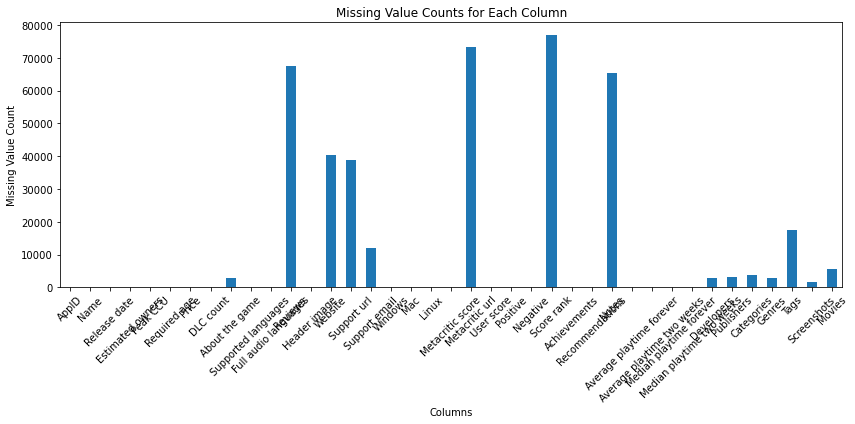

In [11]:
# Plot missing value counts
plt.figure(figsize=(12, 6))
missing_counts.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Missing Value Count')
plt.title('Missing Value Counts for Each Column')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### oh man, this is crowded. Lets try one with only the missing values

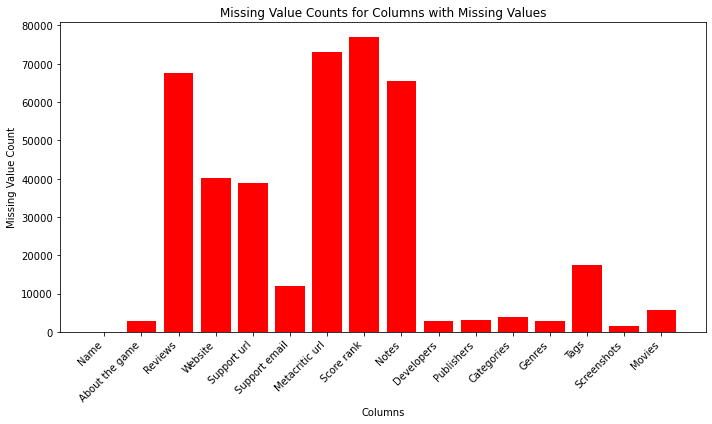

In [12]:
# Calculate the count of missing values in each column
missing_counts = df.isnull().sum()

# Filter columns with missing values
missing_columns = missing_counts[missing_counts > 0]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot for missing values
plt.bar(missing_columns.index, missing_columns.values, color='red')
plt.xlabel('Columns')
plt.ylabel('Missing Value Count')
plt.title('Missing Value Counts for Columns with Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


we can see "Name" on this graph. It has two missing values

In [13]:
# Check for duplicated rows
duplicates = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()

print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


In [14]:
# Get numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Check for negative values in numeric columns
negative_values = {}
for column in numeric_columns:
    negative_values[column] = df[df[column] < 0]

print("Columns with negative values:")
for column, negative_rows in negative_values.items():
    if not negative_rows.empty:
        print(f"Column: {column}")
        print(negative_rows)
        print("=" * 50)

Columns with negative values:


In [15]:
# Display the first few rows of the DataFrame
#print(df.head())
display(df.head(3))
display(df.tail(3))

AppID              Name  Release date Estimated owners  Peak CCU  \
0    20200  Galactic Bowling  Oct 21, 2008        0 - 20000         0   
1   655370      Train Bandit  Oct 12, 2017        0 - 20000         0   
2  1732930      Jolt Project  Nov 17, 2021        0 - 20000         0   

   Required age  Price  DLC count  \
0             0  19.99          0   
1             0   0.99          0   
2             0   4.99          0   

                                      About the game  \
0  Galactic Bowling is an exaggerated and stylize...   
1  THE LAW!! Looks to be a showdown atop a train....   
2  Jolt Project: The army now has a new robotics ...   

                                 Supported languages Full audio languages  \
0                                        ['English']                   []   
1  ['English', 'French', 'Italian', 'German', 'Sp...                   []   
2                 ['English', 'Portuguese - Brazil']                   []   

  Reviews                                       Header image  \
0     NaN  https://cdn.akamai.steamstatic.com/steam/apps/...   
1     NaN  https://cdn.akamai.steamstatic.com/steam/apps/...   
2     NaN  https://cdn.akamai.steamstatic.com/steam/apps/...   

                          Website Support url              Support email  \
0  http://www.galacticbowling.net         NaN                        NaN   
1          http://trainbandit.com         NaN    support@rustymoyher.com   
2                             NaN         NaN  ramoncampiaof31@gmail.com   

   Windows    Mac  Linux  Metacritic score Metacritic url  User score  \
0     True  False  False                 0            NaN           0   
1     True   True  False                 0            NaN           0   
2     True  False  False                 0            NaN           0   

   Positive  Negative  Score rank  Achievements  Recommendations Notes  \
0         6        11         NaN            30                0   NaN   
1        53         5         NaN            12                0   NaN   
2         0         0         NaN             0                0   NaN   

   Average playtime forever  Average playtime two weeks  \
0                         0                           0   
1                         0                           0   
2                         0                           0   

   Median playtime forever  Median playtime two weeks             Developers  \
0                        0                          0  Perpetual FX Creative   
1                        0                          0           Rusty Moyher   
2                        0                          0          Campião Games   

              Publishers                                         Categories  \
0  Perpetual FX Creative  Single-player,Multi-player,Steam Achievements,...   
1           Wild Rooster  Single-player,Steam Achievements,Full controll...   
2          Campião Games                                      Single-player   

                            Genres  \
0              Casual,Indie,Sports   
1                     Action,Indie   
2  Action,Adventure,Indie,Strategy   

                                                Tags  \
0                        Indie,Casual,Sports,Bowling   
1  Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...   
2                                                NaN   

                                         Screenshots  \
0  https://cdn.akamai.steamstatic.com/steam/apps/...   
1  https://cdn.akamai.steamstatic.com/steam/apps/...   
2  https://cdn.akamai.steamstatic.com/steam/apps/...   

                                              Movies  
0  http://cdn.akamai.steamstatic.com/steam/apps/2...  
1  http://cdn.akamai.steamstatic.com/steam/apps/2...  
2  http://cdn.akamai.steamstatic.com/steam/apps/2...

AppID                    Name Release date Estimated owners  \
76984  2503930  Surreal House Playtest  Aug 1, 2023            0 - 0   
76985  2524860         Spot the Object  Aug 4, 2023        0 - 20000   
76986  2431960     擱淺地 - Dream Antique  Aug 2, 2023            0 - 0   

       Peak CCU  Required age  Price  DLC count  \
76984         0             0   0.00          0   
76985         0             0   3.99          0   
76986         0             0   0.00          0   

                                          About the game  \
76984                                                NaN   
76985  Welcome to the captivating world of 'Spot the ...   
76986  「拼湊夢想的碎片，尋回最初的夢想」 請跟隨思彤的腳步與他人相遇並在擱淺地中一步步解開真相吧 ...   

           Supported languages Full audio languages Reviews  \
76984                       []                   []     NaN   
76985              ['English']          ['English']     NaN   
76986  ['Traditional Chinese']                   []     NaN   

                                            Header image  \
76984  https://cdn.akamai.steamstatic.com/steam/apps/...   
76985  https://cdn.akamai.steamstatic.com/steam/apps/...   
76986  https://cdn.akamai.steamstatic.com/steam/apps/...   

                                            Website Support url  \
76984                                           NaN         NaN   
76985                                           NaN         NaN   
76986  https://duyoushan1.wixsite.com/dream-antique         NaN   

              Support email  Windows    Mac  Linux  Metacritic score  \
76984                   NaN     True  False  False                 0   
76985  info@zenvision.co.za     True  False  False                 0   
76986   huayi1128@gmail.com     True  False  False                 0   

      Metacritic url  User score  Positive  Negative  Score rank  \
76984            NaN           0         0         0         NaN   
76985            NaN           0         2         1         NaN   
76986            NaN           0         0         0         NaN   

       Achievements  Recommendations Notes  Average playtime forever  \
76984             0                0   NaN                         0   
76985             8                0   NaN                         0   
76986             0                0   NaN                         0   

       Average playtime two weeks  Median playtime forever  \
76984                           0                        0   
76985                           0                        0   
76986                           0                        0   

       Median playtime two weeks           Developers           Publishers  \
76984                          0                  NaN                  NaN   
76985                          0      ZenVision Games      ZenVision Games   
76986                          0  擱淺地 - Dream Antique  擱淺地 - Dream Antique   

                             Categories                            Genres  \
76984                               NaN                               NaN   
76985  Single-player,Steam Achievements  Casual,Indie,Simulation,Strategy   
76986                     Single-player     Casual,Free to Play,Indie,RPG   

                                                    Tags  \
76984                                                NaN   
76985  Casual,Simulation,Strategy,Point & Click,Puzzl...   
76986                                                NaN   

                                             Screenshots  \
76984                                                NaN   
76985  https://cdn.akamai.steamstatic.com/steam/apps/...   
76986  https://cdn.akamai.steamstatic.com/steam/apps/...   

                                                  Movies  
76984                                                NaN  
76985  http://cdn.akamai.steamstatic.com/steam/apps/2...  
76986  http://cdn.akamai.steamstatic.com/steam/apps/2...

-----

# This should give us a good baseline for our Data - Cleaning Process

we will start with normalizing headers

In [16]:
# before
games.columns

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')

In [17]:
# Normalize column headers
df.columns = df.columns.str.lower()  # Convert to lowercase
df.columns = df.columns.str.replace(' ', '_')  # Replace spaces with underscores
df.columns = df.columns.str.replace('[^\w\s]', '')  # Remove special characters

print("Normalized column headers:")
print(df.columns)

Normalized column headers:
Index(['appid', 'name', 'release_date', 'estimated_owners', 'peak_ccu',
       'required_age', 'price', 'dlc_count', 'about_the_game',
       'supported_languages', 'full_audio_languages', 'reviews',
       'header_image', 'website', 'support_url', 'support_email', 'windows',
       'mac', 'linux', 'metacritic_score', 'metacritic_url', 'user_score',
       'positive', 'negative', 'score_rank', 'achievements', 'recommendations',
       'notes', 'average_playtime_forever', 'average_playtime_two_weeks',
       'median_playtime_forever', 'median_playtime_two_weeks', 'developers',
       'publishers', 'categories', 'genres', 'tags', 'screenshots', 'movies'],
      dtype='object')


/var/folders/yg/z64xf8615mxbsw25_zldzjnm0000gn/T/ipykernel_2400/773374837.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('[^\w\s]', '')  # Remove special characters


nothing fancy happend, the dataset was well prepared in Kaggle

In [18]:
# Convert 'Release date' to datetime format
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

print("DataFrame with 'Release date' in datetime format:")
display(df.head())

DataFrame with 'Release date' in datetime format:


appid                   name release_date estimated_owners  peak_ccu  \
0    20200       Galactic Bowling   2008-10-21        0 - 20000         0   
1   655370           Train Bandit   2017-10-12        0 - 20000         0   
2  1732930           Jolt Project   2021-11-17        0 - 20000         0   
3  1355720               Henosis™   2020-07-23        0 - 20000         0   
4  1139950  Two Weeks in Painland   2020-02-03        0 - 20000         0   

   required_age  price  dlc_count  \
0             0  19.99          0   
1             0   0.99          0   
2             0   4.99          0   
3             0   5.99          0   
4             0   0.00          0   

                                      about_the_game  \
0  Galactic Bowling is an exaggerated and stylize...   
1  THE LAW!! Looks to be a showdown atop a train....   
2  Jolt Project: The army now has a new robotics ...   
3  HENOSIS™ is a mysterious 2D Platform Puzzler w...   
4  ABOUT THE GAME Play as a hacker who has arrang...   

                                 supported_languages full_audio_languages  \
0                                        ['English']                   []   
1  ['English', 'French', 'Italian', 'German', 'Sp...                   []   
2                 ['English', 'Portuguese - Brazil']                   []   
3  ['English', 'French', 'Italian', 'German', 'Sp...                   []   
4                     ['English', 'Spanish - Spain']                   []   

  reviews                                       header_image  \
0     NaN  https://cdn.akamai.steamstatic.com/steam/apps/...   
1     NaN  https://cdn.akamai.steamstatic.com/steam/apps/...   
2     NaN  https://cdn.akamai.steamstatic.com/steam/apps/...   
3     NaN  https://cdn.akamai.steamstatic.com/steam/apps/...   
4     NaN  https://cdn.akamai.steamstatic.com/steam/apps/...   

                               website  \
0       http://www.galacticbowling.net   
1               http://trainbandit.com   
2                                  NaN   
3             https://henosisgame.com/   
4  https://www.unusual-games.com/home/   

                              support_url                    support_email  \
0                                     NaN                              NaN   
1                                     NaN          support@rustymoyher.com   
2                                     NaN        ramoncampiaof31@gmail.com   
3                https://henosisgame.com/             info@henosisgame.com   
4  https://www.unusual-games.com/contact/  welistentoyou@unusual-games.com   

   windows    mac  linux  metacritic_score metacritic_url  user_score  \
0     True  False  False                 0            NaN           0   
1     True   True  False                 0            NaN           0   
2     True  False  False                 0            NaN           0   
3     True   True   True                 0            NaN           0   
4     True   True  False                 0            NaN           0   

   positive  negative  score_rank  achievements  recommendations  \
0         6        11         NaN            30                0   
1        53         5         NaN            12                0   
2         0         0         NaN             0                0   
3         3         0         NaN             0                0   
4        50         8         NaN            17                0   

                                               notes  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  This Game may contain content not appropriate ...   

   average_playtime_forever  average_playtime_two_weeks  \
0                         0                           0   
1                         0                           0   
2                         0                       

In [19]:
# Choose a specific numeric column (e.g., 'Price') to check for outliers
column_name = 'price'

# Calculate the first and third quartiles
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify potential outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print("Potential outliers:")
display(outliers)

Potential outliers:


appid                                               name  \
10     1026420                                             WARSAW   
22      434030                      Aerofly FS 2 Flight Simulator   
47      552520                                         Far Cry® 5   
57     1293830                                    Forza Horizon 4   
69     1163340  Carrier Battles 4 Guadalcanal - Pacific War Na...   
...        ...                                                ...   
76795  2242710                               Koi x Shin Ai Kanojo   
76830  2485190                           MediBang Paint for Steam   
76832  1903290                                       Premortal VR   
76908  2375780                        Eyeware Beam Webcam Edition   
76961  1774380                                      Cine Tracer 2   

      release_date   estimated_owners  peak_ccu  required_age  price  \
10      2019-10-02      20000 - 50000         5             0  23.99   
22      2017-11-20    100000 - 200000        19             0  37.49   
47      2018-03-26  2000000 - 5000000      2164            17  59.99   
57      2021-03-09  2000000 - 5000000      7571             0  59.99   
69      2020-06-05          0 - 20000         8             0  29.99   
...            ...                ...       ...           ...    ...   
76795   2023-08-04          0 - 20000        49             0  26.24   
76830   2023-07-31          0 - 20000         4             0  29.99   
76832   2023-07-31          0 - 20000         1             0  26.99   
76908   2023-08-02          0 - 20000         0             0  50.99   
76961   2023-08-01          0 - 20000         3             0  89.99   

       dlc_count                                     about_the_game  \
10             0  Use everything at your disposal to help a team...   
22            23  Aerofly FS 2 lets you explore the world of fly...   
47             5  Far Cry comes to America in the latest install...   
57            15  Dynamic seasons change everything at the world...   
69             3  This is a classic hex-and-counter digital warg...   
...          ...                                                ...   
76795          0  《想要传达给你的爱恋》官方中文版现已发售！首促仅需66元即可入手！游戏拥有超越原版的1920...   
76830          0  “Draw Anywhere, With Anything.” MediBang Paint...   
76832          0  What is Premortal VR? Premortal VR is an explo...   
76908          0  Gaming Extensions Immersive In-Game Camera Con...   
76961          0  Cine Tracer 2 is a virtual filmmaking sandbox ...   

                                     supported_languages  \
10     ['English', 'French', 'German', 'Polish', 'Rus...   
22                       ['English', 'German', 'French']   
47     ['English', 'French', 'Italian', 'German', 'Sp...   
57     ['English', 'French', 'Italian', 'German', 'Sp...   
69     ['English', 'French', 'Spanish - Spain', 'Simp...   
...                                                  ...   
76795      ['Simplified Chinese', 'Traditional Chinese']   
76830  ['English', 'Japanese', 'Korean', 'Portuguese ...   
76832                                        ['English']   
76908                                        ['English']   
76961                                        ['English']   

                                    full_audio_languages  \
10                                                    []   
22                       ['English', 'German', 'French']   
47     ['English', 'French', 'Italian', 'German', 'Sp...   
57     ['English', 'French', 'German', 'Portuguese - ...   
69                                                    []   
...                                                  ...   
76795                                                 []   
76830                                                 []   
76832                                        ['English']   
76908                                        ['English']   
76961                                                 []   

                    

-------

# We will check the missing values again and see what we can do here

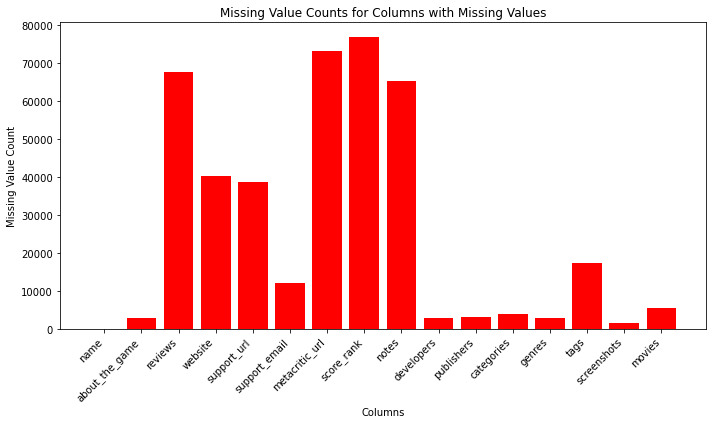

In [20]:
# Calculate the count of missing values in each column
missing_counts = df.isnull().sum()

# Filter columns with missing values
missing_columns = missing_counts[missing_counts > 0]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot for missing values
plt.bar(missing_columns.index, missing_columns.values, color='red')
plt.xlabel('Columns')
plt.ylabel('Missing Value Count')
plt.title('Missing Value Counts for Columns with Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


that is a nice visualization for the missing values

wouldn´t that nice to see the numbers behind that?

In [21]:
# Calculate the total number of rows
total_rows = len(df)

# Calculate the count and percentage of missing values for each column
missing_values = df.isnull().sum()
non_missing_values = total_rows - missing_values
missing_percentage = (missing_values / total_rows) * 100

# Calculate the total values (missing + non-missing) for each column
total_values = missing_values + non_missing_values

# Create a DataFrame to display the missing value counts, non-missing counts, percentages, and total values
missing_info = pd.DataFrame({'Non-Missing Values': non_missing_values, 'Missing Values': missing_values, 'Percentage': missing_percentage, 'Total Values': total_values})
missing_info = missing_info[missing_info['Missing Values'] > 0]  # Select columns with missing values

print("Missing, Non-Missing, and Total Value Counts and Percentages:")
print(missing_info)


Missing, Non-Missing, and Total Value Counts and Percentages:
                Non-Missing Values  Missing Values  Percentage  Total Values
name                         76985               2    0.002598         76987
about_the_game               74070            2917    3.788951         76987
reviews                       9362           67625   87.839505         76987
website                      36679           40308   52.356891         76987
support_url                  38228           38759   50.344863         76987
support_email                64897           12090   15.703950         76987
metacritic_url                3792           73195   95.074493         76987
score_rank                      42           76945   99.945445         76987
notes                        11503           65484   85.058516         76987
developers                   74047            2940    3.818827         76987
publishers                   73811            3176    4.125372         76987
categories    

or maybe another visualisation

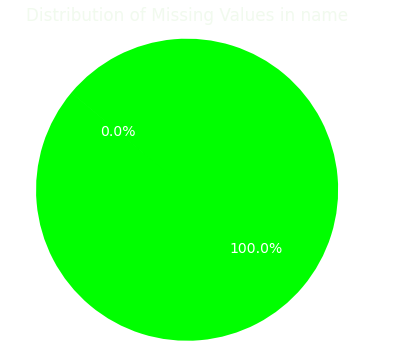

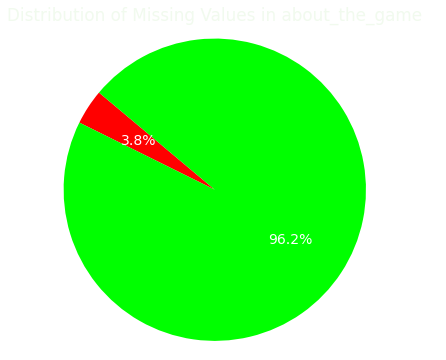

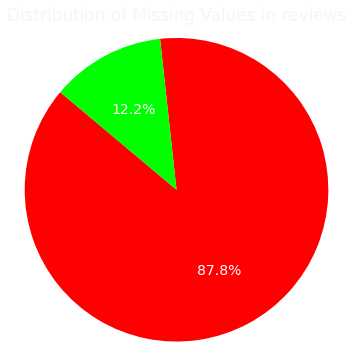

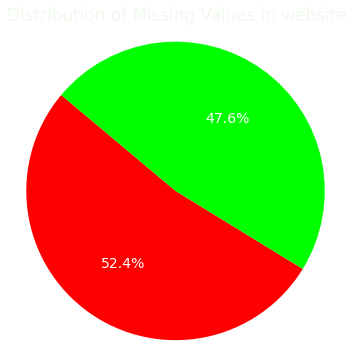

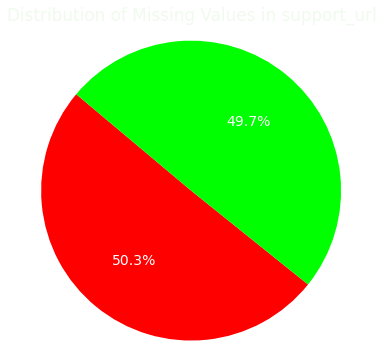

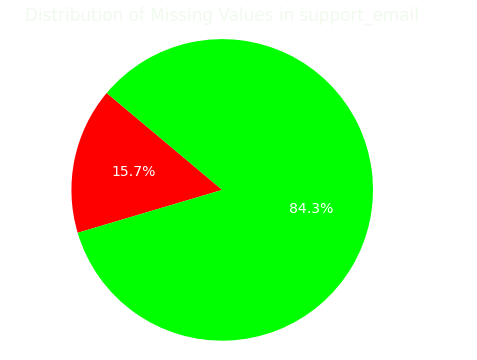

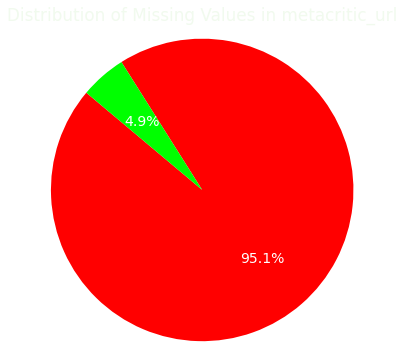

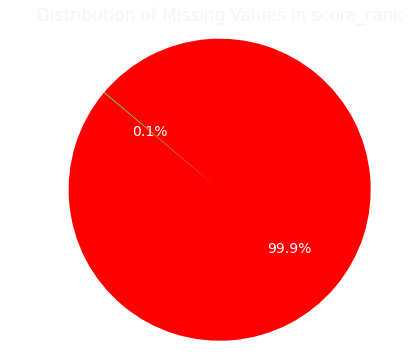

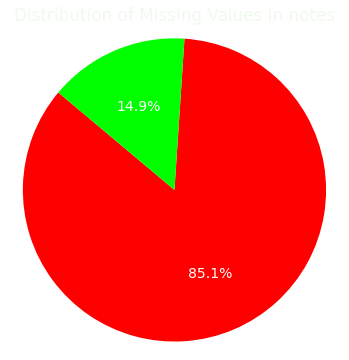

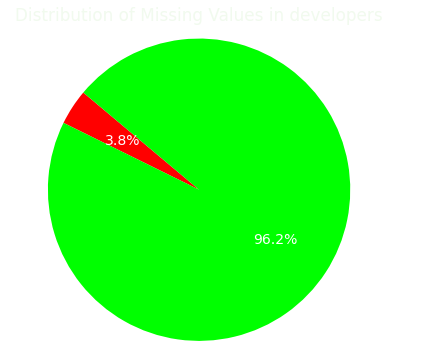

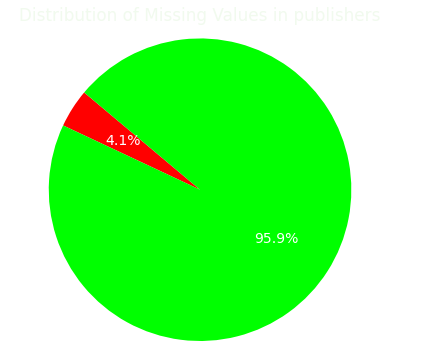

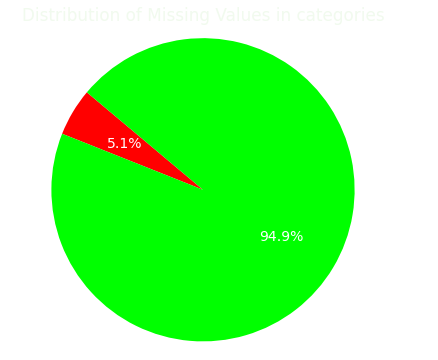

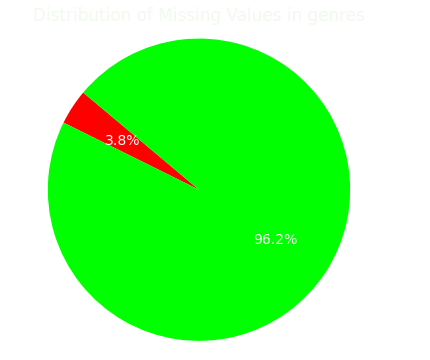

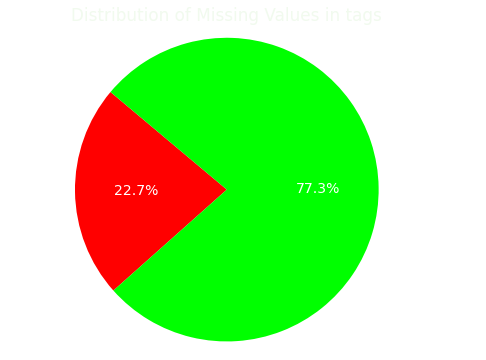

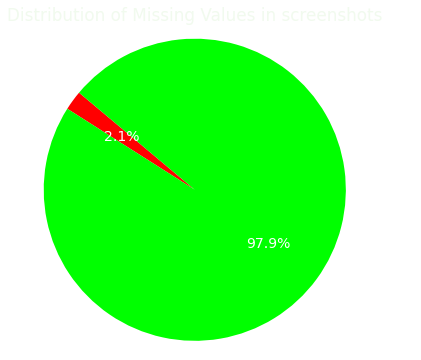

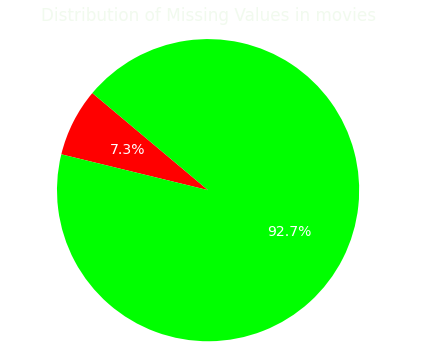

In [22]:
# Calculate the total number of rows
total_rows = len(df)

# Calculate the count of missing values for each column
missing_values = df.isnull().sum()

# Define custom colors for the pie chart segments
colors = ['#FF0000', '#00FF00']  # Red for missing, green for non-missing
title_color = '#F1FAEE'  # Replace with a contrasting title text color

# Set the font size and color for the labels
plt.rcParams['font.size'] = 14
plt.rcParams['text.color'] = 'white'  # Black color for labels

# Create separate pie charts with custom colors for columns with missing values
for column, count in missing_values.items():
    if count > 0:
        plt.figure(figsize=(6, 6))
        plt.pie([count, total_rows - count], labels=['Missing', 'Non-Missing'], autopct='%1.1f%%', startangle=140, colors=colors)
        plt.title(f'Distribution of Missing Values in {column}', color=title_color)  # Black title text
        plt.axis('equal')
        plt.gca().set_facecolor('white')  # White background
        plt.show()

I think, we could do this visualization also in Tableau, but for our purposes the most part is not relevant. So maybe we should delete the Columns with massivly missing values.

before we delete anything lets check

In [23]:
# Select rows with missing values in the 'Name' column
missing_name_rows = df[df['name'].isnull()]

print("Rows with Missing Values in the 'Name' Column:")
display(missing_name_rows)

Rows with Missing Values in the 'Name' Column:


appid name release_date estimated_owners  peak_ccu  required_age  \
25222   396420  NaN   2016-11-01            0 - 0         0             0   
72038  1116910  NaN   2019-09-25            0 - 0         0             0   

       price  dlc_count                                     about_the_game  \
25222   0.00          0  Spookeningは3Dの恐怖ゲームで、あなたは毎夜に死んでゴーストとして復活します。 村...   
72038   6.99          0                                                NaN   

      supported_languages full_audio_languages reviews  \
25222                  []                   []     NaN   
72038                  []                   []     NaN   

                                            header_image website support_url  \
25222  https://cdn.akamai.steamstatic.com/steam/apps/...     NaN         NaN   
72038  https://cdn.akamai.steamstatic.com/steam/apps/...     NaN         NaN   

      support_email  windows    mac  linux  metacritic_score metacritic_url  \
25222           NaN     True  False  False                 0            NaN   
72038           NaN     True  False  False                 0            NaN   

       user_score  positive  negative  score_rank  achievements  \
25222           0         0         0         NaN             0   
72038           0         0         0         NaN             0   

       recommendations                                              notes  \
25222                0                                                NaN   
72038                0  The content contained in this game may not be ...   

       average_playtime_forever  average_playtime_two_weeks  \
25222                         0                           0   
72038                         0                           0   

       median_playtime_forever  median_playtime_two_weeks developers  \
25222                        0                          0        NaN   
72038                        0                          0        NaN   

      publishers                 categories  \
25222        NaN                        NaN   
72038        NaN  Single-player,Steam Cloud   

                                                  genres tags  \
25222                                                NaN  NaN   
72038  Action,Adventure,Casual,Indie,RPG,Simulation,S...  NaN   

                                             screenshots  \
25222                                                NaN   
72038  https://cdn.akamai.steamstatic.com/steam/apps/...   

                                                  movies  
25222                                                NaN  
72038  http://cdn.akamai.steamstatic.com/steam/apps/2...

In [24]:
# Delete rows where the values in the 'Name' column are missing
df_cleaned = df[df['name'].notnull()]
display(df_cleaned.head())

appid                   name release_date estimated_owners  peak_ccu  \
0    20200       Galactic Bowling   2008-10-21        0 - 20000         0   
1   655370           Train Bandit   2017-10-12        0 - 20000         0   
2  1732930           Jolt Project   2021-11-17        0 - 20000         0   
3  1355720               Henosis™   2020-07-23        0 - 20000         0   
4  1139950  Two Weeks in Painland   2020-02-03        0 - 20000         0   

   required_age  price  dlc_count  \
0             0  19.99          0   
1             0   0.99          0   
2             0   4.99          0   
3             0   5.99          0   
4             0   0.00          0   

                                      about_the_game  \
0  Galactic Bowling is an exaggerated and stylize...   
1  THE LAW!! Looks to be a showdown atop a train....   
2  Jolt Project: The army now has a new robotics ...   
3  HENOSIS™ is a mysterious 2D Platform Puzzler w...   
4  ABOUT THE GAME Play as a hacker who has arrang...   

                                 supported_languages full_audio_languages  \
0                                        ['English']                   []   
1  ['English', 'French', 'Italian', 'German', 'Sp...                   []   
2                 ['English', 'Portuguese - Brazil']                   []   
3  ['English', 'French', 'Italian', 'German', 'Sp...                   []   
4                     ['English', 'Spanish - Spain']                   []   

  reviews                                       header_image  \
0     NaN  https://cdn.akamai.steamstatic.com/steam/apps/...   
1     NaN  https://cdn.akamai.steamstatic.com/steam/apps/...   
2     NaN  https://cdn.akamai.steamstatic.com/steam/apps/...   
3     NaN  https://cdn.akamai.steamstatic.com/steam/apps/...   
4     NaN  https://cdn.akamai.steamstatic.com/steam/apps/...   

                               website  \
0       http://www.galacticbowling.net   
1               http://trainbandit.com   
2                                  NaN   
3             https://henosisgame.com/   
4  https://www.unusual-games.com/home/   

                              support_url                    support_email  \
0                                     NaN                              NaN   
1                                     NaN          support@rustymoyher.com   
2                                     NaN        ramoncampiaof31@gmail.com   
3                https://henosisgame.com/             info@henosisgame.com   
4  https://www.unusual-games.com/contact/  welistentoyou@unusual-games.com   

   windows    mac  linux  metacritic_score metacritic_url  user_score  \
0     True  False  False                 0            NaN           0   
1     True   True  False                 0            NaN           0   
2     True  False  False                 0            NaN           0   
3     True   True   True                 0            NaN           0   
4     True   True  False                 0            NaN           0   

   positive  negative  score_rank  achievements  recommendations  \
0         6        11         NaN            30                0   
1        53         5         NaN            12                0   
2         0         0         NaN             0                0   
3         3         0         NaN             0                0   
4        50         8         NaN            17                0   

                                               notes  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  This Game may contain content not appropriate ...   

   average_playtime_forever  average_playtime_two_weeks  \
0                         0                           0   
1                         0                           0   
2                         0                       

In [25]:
# Check for missing values
missing_values_cleaned = df_cleaned.isnull()

# Count the number of missing values in each column
missing_counts_cleaned = missing_values_cleaned.sum()

print("Missing value counts for each column:")
display(missing_counts_cleaned)

Missing value counts for each column:


appid                             0
name                              0
release_date                      0
estimated_owners                  0
peak_ccu                          0
required_age                      0
price                             0
dlc_count                         0
about_the_game                 2916
supported_languages               0
full_audio_languages              0
reviews                       67623
header_image                      0
website                       40306
support_url                   38757
support_email                 12088
windows                           0
mac                               0
linux                             0
metacritic_score                  0
metacritic_url                73193
user_score                        0
positive                          0
negative                          0
score_rank                    76943
achievements                      0
recommendations                   0
notes                       

before we do any statistical analysis, we drop all non-essential columns. We mostly would drop all non-INTEGER values.

In [26]:
# Columns to drop
columns_to_drop = ['website', 
                    'support_url', 
                    'support_email',
                    'about_the_game',
                    'score_rank',
                    'notes',
                    'reviews',
                    'metacritic_url',
                    'developers', 
                    'publishers', 
                    'categories', 
                    'genres', 
                    'tags', 
                    'screenshots', 
                    'movies']

# Drop the specified columns
df_small = df_cleaned.drop(columns=columns_to_drop)


In [27]:
# Check for missing values
missing_values_small = df_small.isnull()

# Count the number of missing values in each column
missing_counts_small = missing_values_small.sum()

print("Missing value counts for each column:")
display(missing_counts_small)

Missing value counts for each column:


appid                         0
name                          0
release_date                  0
estimated_owners              0
peak_ccu                      0
required_age                  0
price                         0
dlc_count                     0
supported_languages           0
full_audio_languages          0
header_image                  0
windows                       0
mac                           0
linux                         0
metacritic_score              0
user_score                    0
positive                      0
negative                      0
achievements                  0
recommendations               0
average_playtime_forever      0
average_playtime_two_weeks    0
median_playtime_forever       0
median_playtime_two_weeks     0
dtype: int64

In [28]:
# Display the information of the dataset
print(df_small.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76985 entries, 0 to 76986
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   appid                       76985 non-null  int64         
 1   name                        76985 non-null  object        
 2   release_date                76985 non-null  datetime64[ns]
 3   estimated_owners            76985 non-null  object        
 4   peak_ccu                    76985 non-null  int64         
 5   required_age                76985 non-null  int64         
 6   price                       76985 non-null  float64       
 7   dlc_count                   76985 non-null  int64         
 8   supported_languages         76985 non-null  object        
 9   full_audio_languages        76985 non-null  object        
 10  header_image                76985 non-null  object        
 11  windows                     76985 non-null  bool      

In [29]:
# Generate descriptive statistics for all numeric columns
descriptive_stats = df_small.describe()

# Print the descriptive statistics
display(descriptive_stats)

appid       peak_ccu  required_age         price     dlc_count  \
count  7.698500e+04   76985.000000  76985.000000  76985.000000  76985.000000   
mean   1.269924e+06     139.627343      0.329051      7.194308      0.583425   
std    6.398172e+05    5625.556306      2.311743     11.096525     14.415657   
min    1.000000e+01       0.000000      0.000000      0.000000      0.000000   
25%    7.335700e+05       0.000000      0.000000      0.990000      0.000000   
50%    1.247860e+06       0.000000      0.000000      4.990000      0.000000   
75%    1.794760e+06       1.000000      0.000000      9.990000      0.000000   
max    2.546410e+06  872138.000000     21.000000    999.000000   2366.000000   

       metacritic_score    user_score      positive       negative  \
count      76985.000000  76985.000000  7.698500e+04   76985.000000   
mean           3.585608      0.041891  1.040583e+03     170.198805   
std           15.925136      1.835090  2.560032e+04    4802.211274   
min            0.000000      0.000000  0.000000e+00       0.000000   
25%            0.000000      0.000000  0.000000e+00       0.000000   
50%            0.000000      0.000000  8.000000e+00       2.000000   
75%            0.000000      0.000000  5.100000e+01      16.000000   
max           97.000000    100.000000  5.764420e+06  895978.000000   

       achievements  recommendations  average_playtime_forever  \
count  76985.000000     7.698500e+04              76985.000000   
mean      20.793440     8.390077e+02                111.395882   
std      179.215454     1.879948e+04               1187.716378   
min        0.000000     0.000000e+00                  0.000000   
25%        0.000000     0.000000e+00                  0.000000   
50%        0.000000     0.000000e+00                  0.000000   
75%       18.000000     0.000000e+00                  0.000000   
max     9821.000000     3.441592e+06             145727.000000   

       average_playtime_two_weeks  median_playtime_forever  \
count                76985.000000             76985.000000   
mean                    11.267299                99.978165   
std                    197.318952              1584.468734   
min                      0.000000                 0.000000   
25%                      0.000000                 0.000000   
50%                      0.000000                 0.000000   
75%                      0.000000                 0.000000   
max                  19159.000000            208473.000000   

       median_playtime_two_weeks  
count               76985.000000  
mean                   12.075145  
std                   214.049548  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     0.000000  
max                 19159.000000

Keep in mind that the correlation coefficient ranges from -1 to 1, where:

-1 indicates a strong negative correlation
0 indicates no correlation
1 indicates a strong positive correlation
Running this code will print out the correlation matrix, which shows the correlation between each pair of numeric columns in your dataset.


In [30]:
# Calculate the correlation matrix for all numeric columns
correlation_matrix = df_small.corr()

# Print the correlation matrix
print(correlation_matrix)

                               appid  peak_ccu  required_age     price  \
appid                       1.000000 -0.014523     -0.101120 -0.087084   
peak_ccu                   -0.014523  1.000000      0.034502  0.042383   
required_age               -0.101120  0.034502      1.000000  0.109037   
price                      -0.087084  0.042383      0.109037  1.000000   
dlc_count                  -0.029947  0.009273      0.014980  0.049003   
windows                     0.006843  0.000465     -0.007837 -0.022591   
mac                        -0.212781  0.007816     -0.005131  0.027235   
linux                      -0.157382  0.009134     -0.000225  0.015227   
metacritic_score           -0.284175  0.059180      0.198124  0.166083   
user_score                 -0.016035 -0.000549      0.084296 -0.000112   
positive                   -0.050403  0.647506      0.068496  0.033565   
negative                   -0.040325  0.590100      0.064143  0.027661   
achievements               -0.058465  

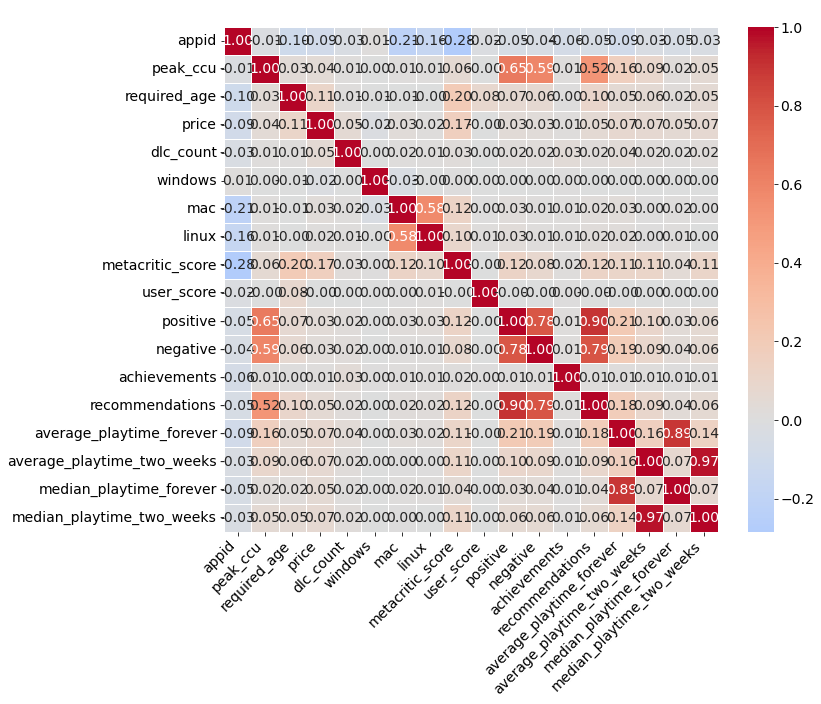

In [31]:
# Calculate the correlation matrix for all numeric columns
correlation_matrix = df_small.corr()

# Set the figure size and create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

                            OLS Regression Results                            
Dep. Variable:               peak_ccu   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     138.5
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           5.91e-32
Time:                        15:49:30   Log-Likelihood:            -7.7396e+05
No. Observations:               76987   AIC:                         1.548e+06
Df Residuals:                   76985   BIC:                         1.548e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.9573     24.141     -0.620      0.5

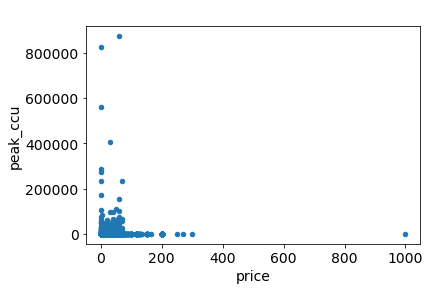

In [32]:
import statsmodels.api as sm


# Choose the variables for the regression analysis
independent_variable = 'price'
dependent_variable = 'peak_ccu'

# Create a scatter plot to visualize the relationship
df_small.plot.scatter(x=independent_variable, y=dependent_variable, title='Scatter Plot')

# Add a constant term to the independent variable for the regression model
X = sm.add_constant(df[independent_variable])

# Perform the linear regression
model = sm.OLS(df[dependent_variable], X).fit()

# Print the regression summary
print(model.summary())

Regression Summary for peak_ccu vs. appid:

                            OLS Regression Results                            
Dep. Variable:               peak_ccu   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     16.24
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           5.59e-05
Time:                        15:49:30   Log-Likelihood:            -7.7402e+05
No. Observations:               76987   AIC:                         1.548e+06
Df Residuals:                   76985   BIC:                         1.548e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

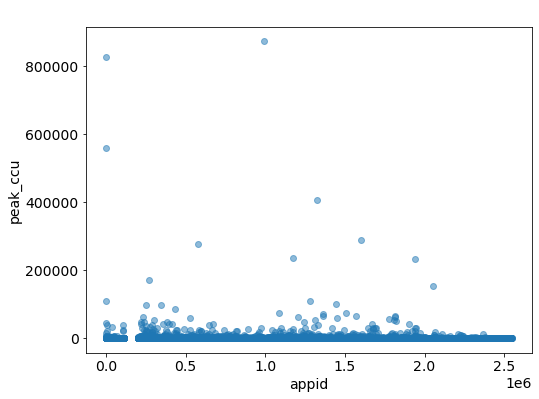

Regression Summary for required_age vs. appid:

                            OLS Regression Results                            
Dep. Variable:           required_age   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     795.3
Date:                Thu, 24 Aug 2023   Prob (F-statistic):          4.49e-174
Time:                        15:49:30   Log-Likelihood:            -1.7336e+05
No. Observations:               76987   AIC:                         3.467e+05
Df Residuals:                   76985   BIC:                         3.467e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

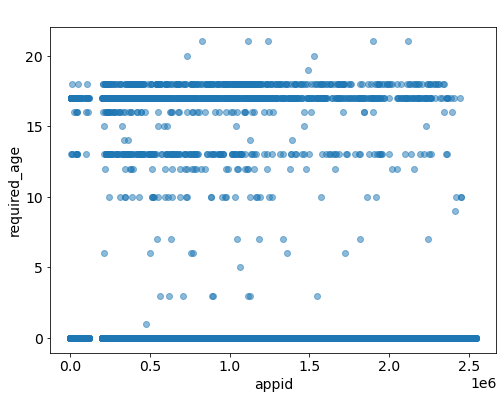

Regression Summary for price vs. appid:

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     588.1
Date:                Thu, 24 Aug 2023   Prob (F-statistic):          1.98e-129
Time:                        15:49:30   Log-Likelihood:            -2.9422e+05
No. Observations:               76987   AIC:                         5.885e+05
Df Residuals:                   76985   BIC:                         5.885e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

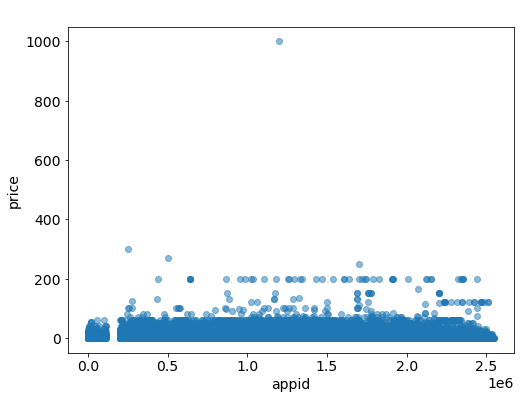

Regression Summary for dlc_count vs. appid:

                            OLS Regression Results                            
Dep. Variable:              dlc_count   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     69.10
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           9.51e-17
Time:                        15:49:30   Log-Likelihood:            -3.1463e+05
No. Observations:               76987   AIC:                         6.293e+05
Df Residuals:                   76985   BIC:                         6.293e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

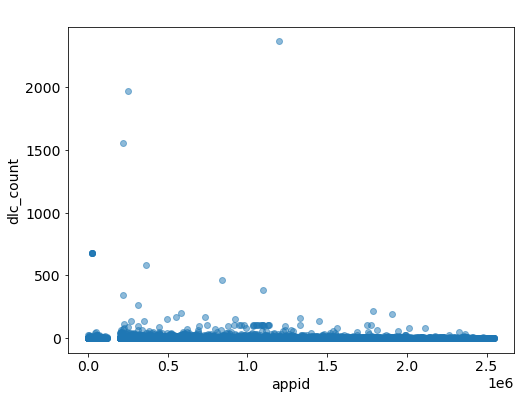

Regression Summary for metacritic_score vs. appid:

                            OLS Regression Results                            
Dep. Variable:       metacritic_score   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     6763.
Date:                Thu, 24 Aug 2023   Prob (F-statistic):               0.00
Time:                        15:49:31   Log-Likelihood:            -3.1909e+05
No. Observations:               76987   AIC:                         6.382e+05
Df Residuals:                   76985   BIC:                         6.382e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


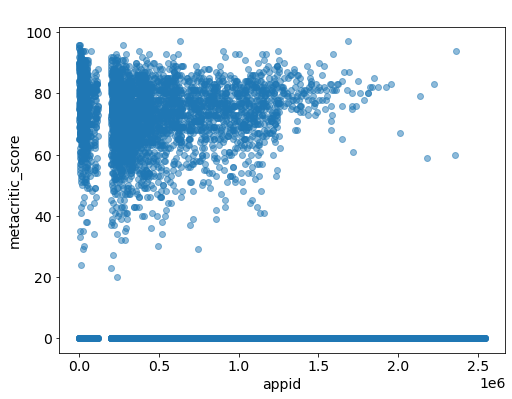

Regression Summary for user_score vs. appid:

                            OLS Regression Results                            
Dep. Variable:             user_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     19.80
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           8.62e-06
Time:                        15:49:31   Log-Likelihood:            -1.5597e+05
No. Observations:               76987   AIC:                         3.119e+05
Df Residuals:                   76985   BIC:                         3.120e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

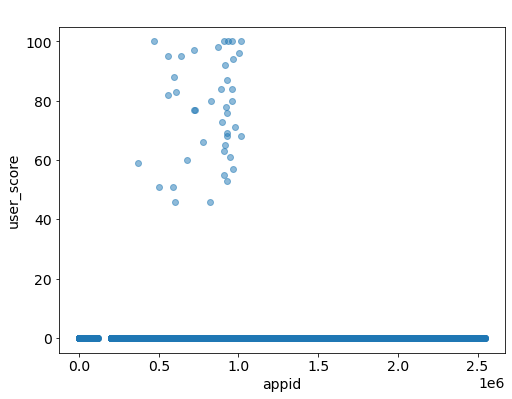

Regression Summary for positive vs. appid:

                            OLS Regression Results                            
Dep. Variable:               positive   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     196.1
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           1.71e-44
Time:                        15:49:31   Log-Likelihood:            -8.9059e+05
No. Observations:               76987   AIC:                         1.781e+06
Df Residuals:                   76985   BIC:                         1.781e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

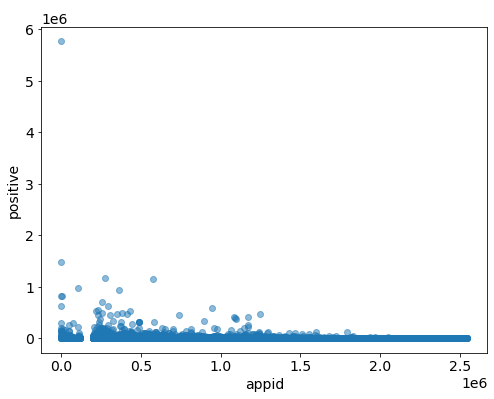

Regression Summary for negative vs. appid:

                            OLS Regression Results                            
Dep. Variable:               negative   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     125.4
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           4.43e-29
Time:                        15:49:31   Log-Likelihood:            -7.6178e+05
No. Observations:               76987   AIC:                         1.524e+06
Df Residuals:                   76985   BIC:                         1.524e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

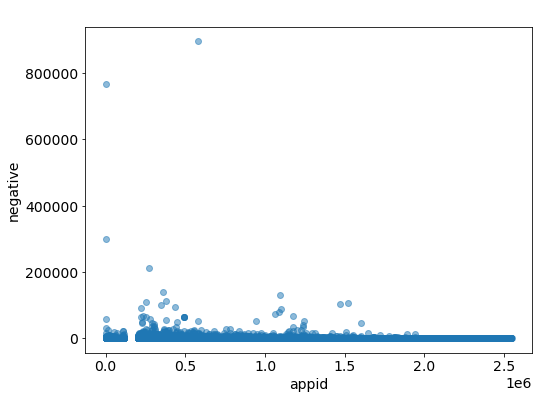

Regression Summary for achievements vs. appid:

                            OLS Regression Results                            
Dep. Variable:           achievements   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     264.0
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           2.86e-59
Time:                        15:49:31   Log-Likelihood:            -5.0856e+05
No. Observations:               76987   AIC:                         1.017e+06
Df Residuals:                   76985   BIC:                         1.017e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

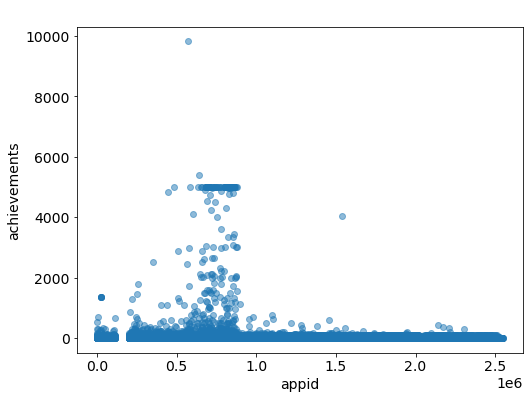

Regression Summary for recommendations vs. appid:

                            OLS Regression Results                            
Dep. Variable:        recommendations   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     213.7
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           2.51e-48
Time:                        15:49:31   Log-Likelihood:            -8.6681e+05
No. Observations:               76987   AIC:                         1.734e+06
Df Residuals:                   76985   BIC:                         1.734e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

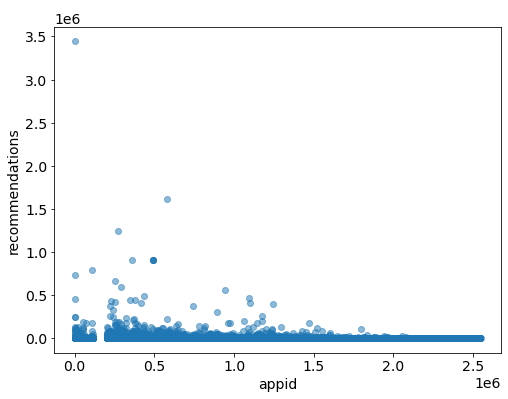

Regression Summary for average_playtime_forever vs. appid:

                               OLS Regression Results                               
Dep. Variable:     average_playtime_forever   R-squared:                       0.008
Model:                                  OLS   Adj. R-squared:                  0.008
Method:                       Least Squares   F-statistic:                     597.3
Date:                      Thu, 24 Aug 2023   Prob (F-statistic):          2.07e-131
Time:                              15:49:31   Log-Likelihood:            -6.5399e+05
No. Observations:                     76987   AIC:                         1.308e+06
Df Residuals:                         76985   BIC:                         1.308e+06
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

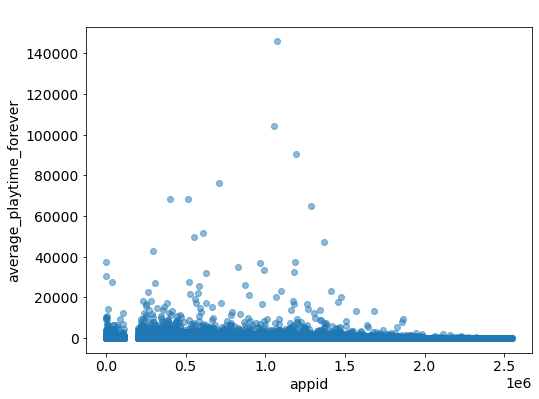

Regression Summary for average_playtime_two_weeks vs. appid:

                                OLS Regression Results                                
Dep. Variable:     average_playtime_two_weeks   R-squared:                       0.001
Model:                                    OLS   Adj. R-squared:                  0.001
Method:                         Least Squares   F-statistic:                     93.58
Date:                        Thu, 24 Aug 2023   Prob (F-statistic):           4.03e-22
Time:                                15:49:31   Log-Likelihood:            -5.1605e+05
No. Observations:                       76987   AIC:                         1.032e+06
Df Residuals:                           76985   BIC:                         1.032e+06
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025  

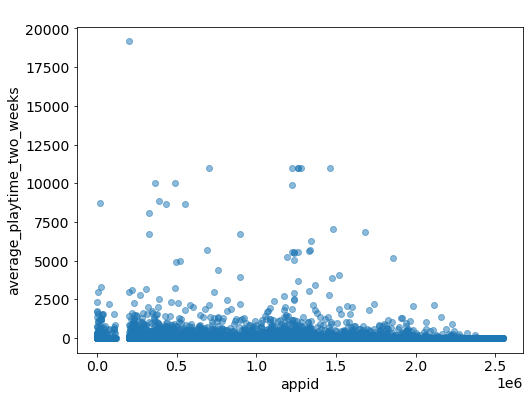

Regression Summary for median_playtime_forever vs. appid:

                               OLS Regression Results                              
Dep. Variable:     median_playtime_forever   R-squared:                       0.003
Model:                                 OLS   Adj. R-squared:                  0.003
Method:                      Least Squares   F-statistic:                     215.7
Date:                     Thu, 24 Aug 2023   Prob (F-statistic):           9.25e-49
Time:                             15:49:31   Log-Likelihood:            -6.7637e+05
No. Observations:                    76987   AIC:                         1.353e+06
Df Residuals:                        76985   BIC:                         1.353e+06
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------

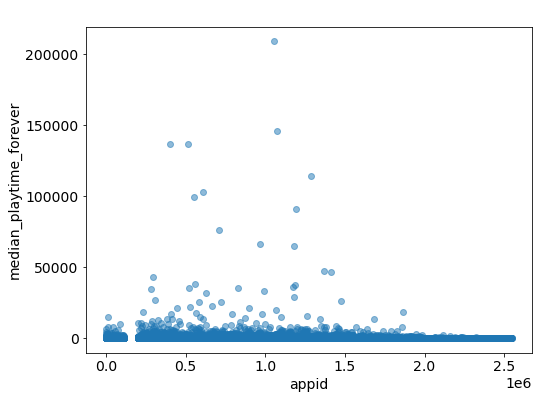

Regression Summary for median_playtime_two_weeks vs. appid:

                                OLS Regression Results                               
Dep. Variable:     median_playtime_two_weeks   R-squared:                       0.001
Model:                                   OLS   Adj. R-squared:                  0.001
Method:                        Least Squares   F-statistic:                     83.64
Date:                       Thu, 24 Aug 2023   Prob (F-statistic):           6.07e-20
Time:                               15:49:31   Log-Likelihood:            -5.2232e+05
No. Observations:                      76987   AIC:                         1.045e+06
Df Residuals:                          76985   BIC:                         1.045e+06
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]


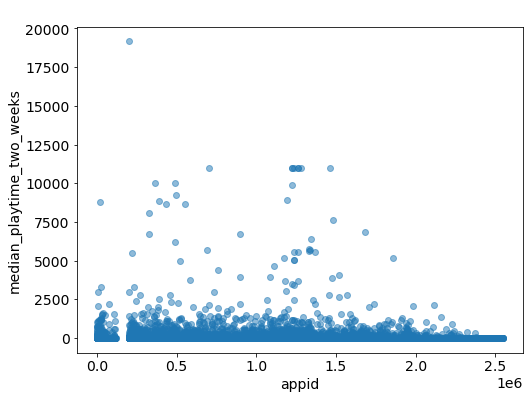

Regression Summary for required_age vs. peak_ccu:

                            OLS Regression Results                            
Dep. Variable:           required_age   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     91.75
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           1.01e-21
Time:                        15:49:31   Log-Likelihood:            -1.7371e+05
No. Observations:               76987   AIC:                         3.474e+05
Df Residuals:                   76985   BIC:                         3.474e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

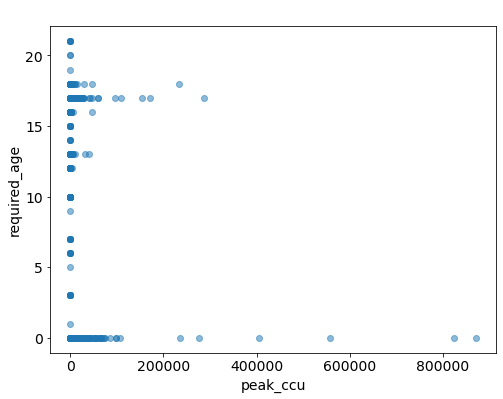

Regression Summary for price vs. peak_ccu:

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     138.5
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           5.91e-32
Time:                        15:49:32   Log-Likelihood:            -2.9445e+05
No. Observations:               76987   AIC:                         5.889e+05
Df Residuals:                   76985   BIC:                         5.889e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

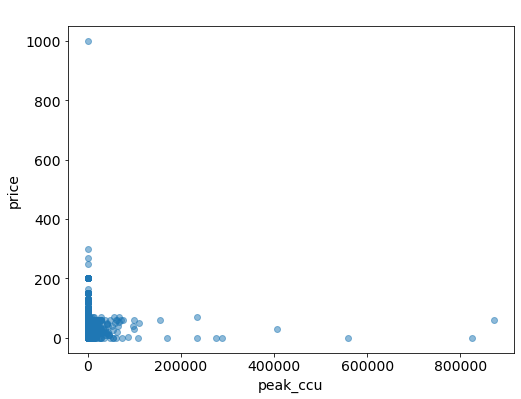

Regression Summary for dlc_count vs. peak_ccu:

                            OLS Regression Results                            
Dep. Variable:              dlc_count   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     6.621
Date:                Thu, 24 Aug 2023   Prob (F-statistic):             0.0101
Time:                        15:49:32   Log-Likelihood:            -3.1466e+05
No. Observations:               76987   AIC:                         6.293e+05
Df Residuals:                   76985   BIC:                         6.293e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

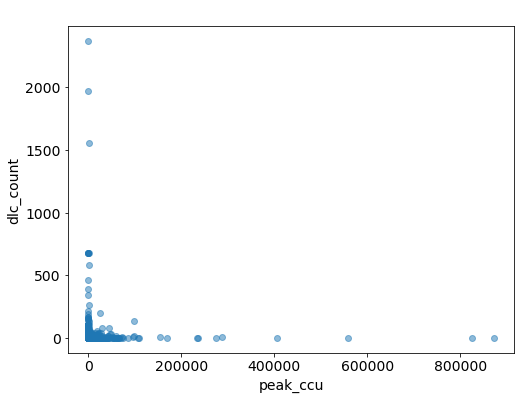

Regression Summary for metacritic_score vs. peak_ccu:

                            OLS Regression Results                            
Dep. Variable:       metacritic_score   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     270.6
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           1.08e-60
Time:                        15:49:32   Log-Likelihood:            -3.2220e+05
No. Observations:               76987   AIC:                         6.444e+05
Df Residuals:                   76985   BIC:                         6.444e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

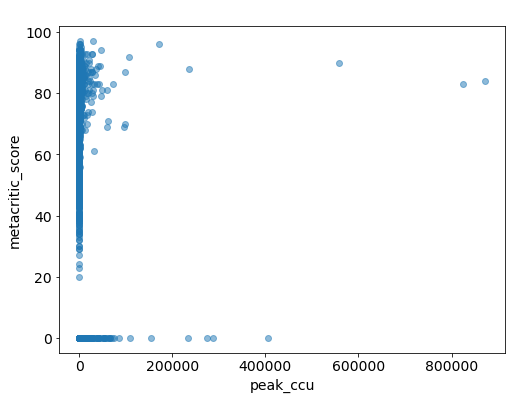

Regression Summary for user_score vs. peak_ccu:

                            OLS Regression Results                            
Dep. Variable:             user_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.02321
Date:                Thu, 24 Aug 2023   Prob (F-statistic):              0.879
Time:                        15:49:32   Log-Likelihood:            -1.5598e+05
No. Observations:               76987   AIC:                         3.120e+05
Df Residuals:                   76985   BIC:                         3.120e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

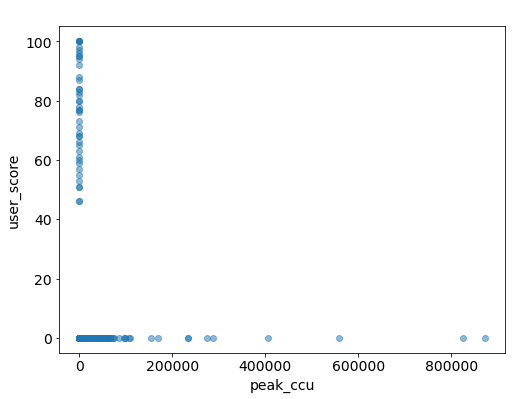

Regression Summary for positive vs. peak_ccu:

                            OLS Regression Results                            
Dep. Variable:               positive   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                 5.558e+04
Date:                Thu, 24 Aug 2023   Prob (F-statistic):               0.00
Time:                        15:49:32   Log-Likelihood:            -8.6976e+05
No. Observations:               76987   AIC:                         1.740e+06
Df Residuals:                   76985   BIC:                         1.740e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

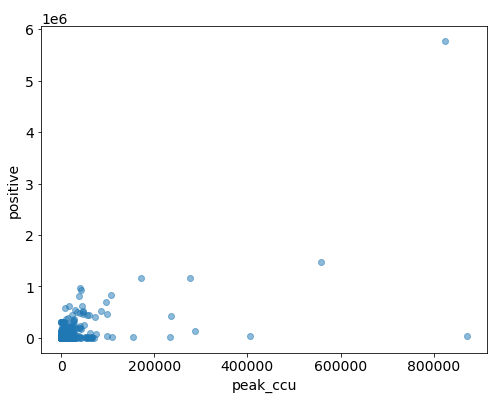

Regression Summary for negative vs. peak_ccu:

                            OLS Regression Results                            
Dep. Variable:               negative   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                 4.113e+04
Date:                Thu, 24 Aug 2023   Prob (F-statistic):               0.00
Time:                        15:49:32   Log-Likelihood:            -7.4537e+05
No. Observations:               76987   AIC:                         1.491e+06
Df Residuals:                   76985   BIC:                         1.491e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

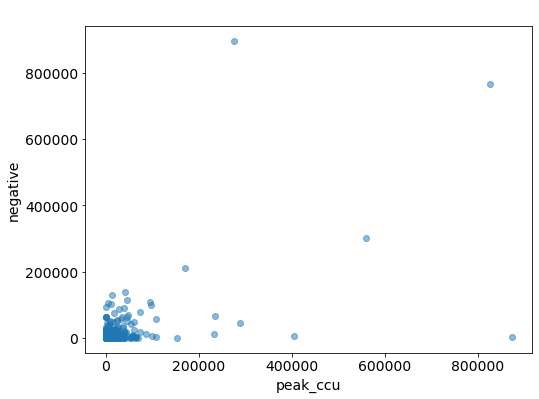

Regression Summary for achievements vs. peak_ccu:

                            OLS Regression Results                            
Dep. Variable:           achievements   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.922
Date:                Thu, 24 Aug 2023   Prob (F-statistic):             0.0477
Time:                        15:49:32   Log-Likelihood:            -5.0869e+05
No. Observations:               76987   AIC:                         1.017e+06
Df Residuals:                   76985   BIC:                         1.017e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

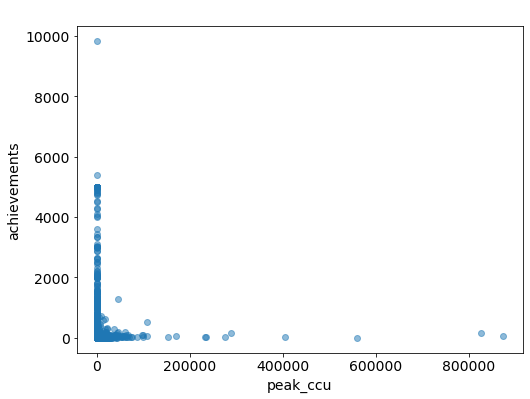

Regression Summary for recommendations vs. peak_ccu:

                            OLS Regression Results                            
Dep. Variable:        recommendations   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                 2.845e+04
Date:                Thu, 24 Aug 2023   Prob (F-statistic):               0.00
Time:                        15:49:32   Log-Likelihood:            -8.5481e+05
No. Observations:               76987   AIC:                         1.710e+06
Df Residuals:                   76985   BIC:                         1.710e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

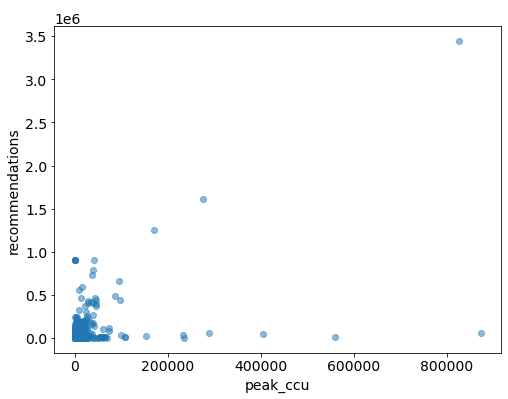

Regression Summary for average_playtime_forever vs. peak_ccu:

                               OLS Regression Results                               
Dep. Variable:     average_playtime_forever   R-squared:                       0.025
Model:                                  OLS   Adj. R-squared:                  0.025
Method:                       Least Squares   F-statistic:                     1975.
Date:                      Thu, 24 Aug 2023   Prob (F-statistic):               0.00
Time:                              15:49:32   Log-Likelihood:            -6.5331e+05
No. Observations:                     76987   AIC:                         1.307e+06
Df Residuals:                         76985   BIC:                         1.307e+06
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------

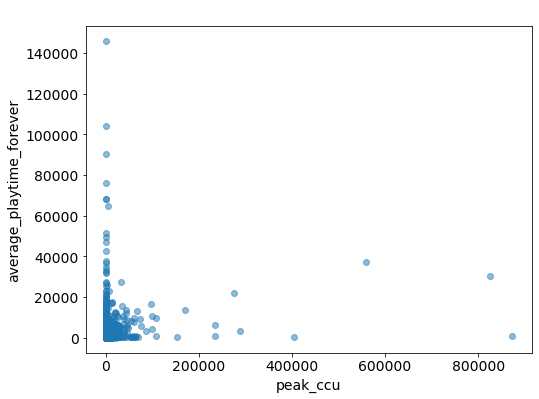

Regression Summary for average_playtime_two_weeks vs. peak_ccu:

                                OLS Regression Results                                
Dep. Variable:     average_playtime_two_weeks   R-squared:                       0.008
Model:                                    OLS   Adj. R-squared:                  0.008
Method:                         Least Squares   F-statistic:                     627.9
Date:                        Thu, 24 Aug 2023   Prob (F-statistic):          5.24e-138
Time:                                15:49:32   Log-Likelihood:            -5.1579e+05
No. Observations:                       76987   AIC:                         1.032e+06
Df Residuals:                           76985   BIC:                         1.032e+06
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.02

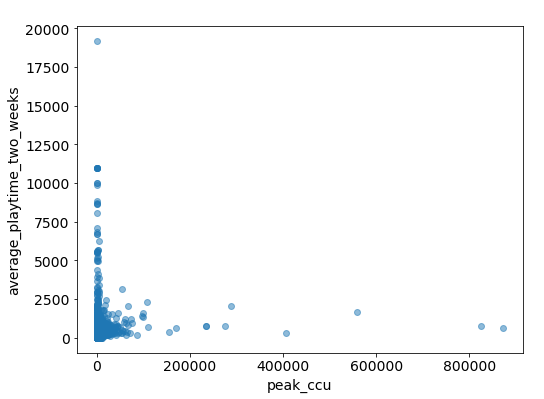

Regression Summary for median_playtime_forever vs. peak_ccu:

                               OLS Regression Results                              
Dep. Variable:     median_playtime_forever   R-squared:                       0.001
Model:                                 OLS   Adj. R-squared:                  0.001
Method:                      Least Squares   F-statistic:                     48.07
Date:                     Thu, 24 Aug 2023   Prob (F-statistic):           4.14e-12
Time:                             15:49:32   Log-Likelihood:            -6.7645e+05
No. Observations:                    76987   AIC:                         1.353e+06
Df Residuals:                        76985   BIC:                         1.353e+06
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------

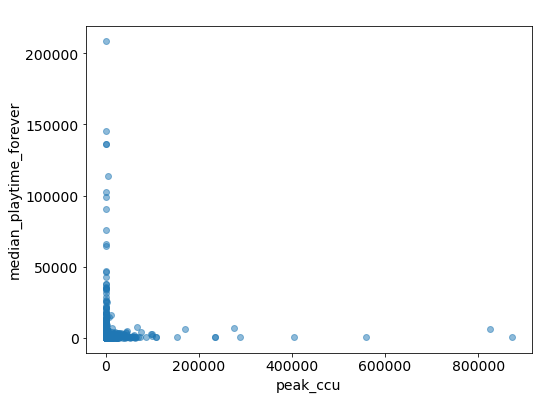

Regression Summary for median_playtime_two_weeks vs. peak_ccu:

                                OLS Regression Results                               
Dep. Variable:     median_playtime_two_weeks   R-squared:                       0.003
Model:                                   OLS   Adj. R-squared:                  0.003
Method:                        Least Squares   F-statistic:                     230.1
Date:                       Thu, 24 Aug 2023   Prob (F-statistic):           6.77e-52
Time:                               15:49:32   Log-Likelihood:            -5.2225e+05
No. Observations:                      76987   AIC:                         1.045e+06
Df Residuals:                          76985   BIC:                         1.045e+06
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.97

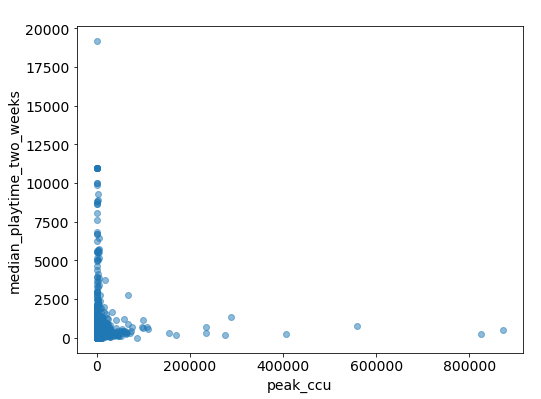

Regression Summary for price vs. required_age:

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     926.3
Date:                Thu, 24 Aug 2023   Prob (F-statistic):          3.00e-202
Time:                        15:49:33   Log-Likelihood:            -2.9406e+05
No. Observations:               76987   AIC:                         5.881e+05
Df Residuals:                   76985   BIC:                         5.881e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------


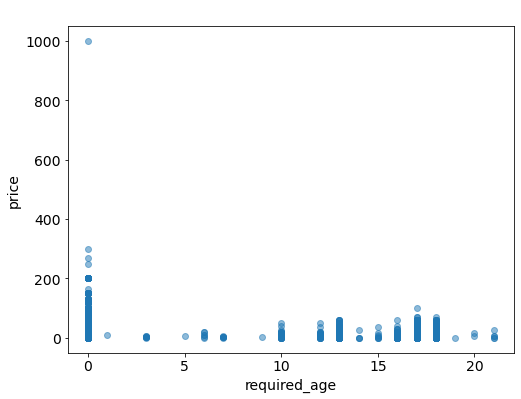

Regression Summary for dlc_count vs. required_age:

                            OLS Regression Results                            
Dep. Variable:              dlc_count   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     17.28
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           3.23e-05
Time:                        15:49:33   Log-Likelihood:            -3.1466e+05
No. Observations:               76987   AIC:                         6.293e+05
Df Residuals:                   76985   BIC:                         6.293e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

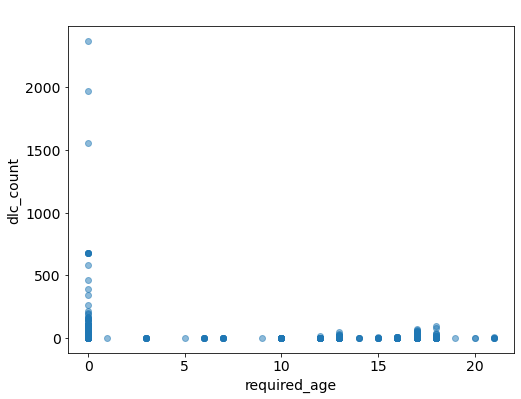

Regression Summary for metacritic_score vs. required_age:

                            OLS Regression Results                            
Dep. Variable:       metacritic_score   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     3145.
Date:                Thu, 24 Aug 2023   Prob (F-statistic):               0.00
Time:                        15:49:33   Log-Likelihood:            -3.2079e+05
No. Observations:               76987   AIC:                         6.416e+05
Df Residuals:                   76985   BIC:                         6.416e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

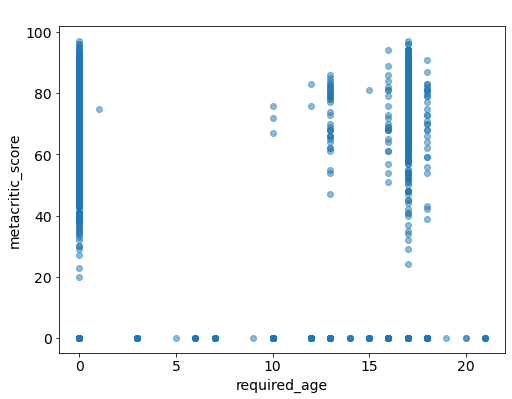

Regression Summary for user_score vs. required_age:

                            OLS Regression Results                            
Dep. Variable:             user_score   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     551.0
Date:                Thu, 24 Aug 2023   Prob (F-statistic):          2.09e-121
Time:                        15:49:33   Log-Likelihood:            -1.5570e+05
No. Observations:               76987   AIC:                         3.114e+05
Df Residuals:                   76985   BIC:                         3.114e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

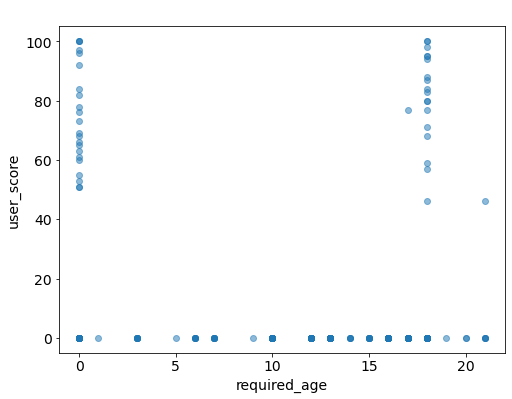

Regression Summary for positive vs. required_age:

                            OLS Regression Results                            
Dep. Variable:               positive   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     362.9
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           1.02e-80
Time:                        15:49:33   Log-Likelihood:            -8.9050e+05
No. Observations:               76987   AIC:                         1.781e+06
Df Residuals:                   76985   BIC:                         1.781e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

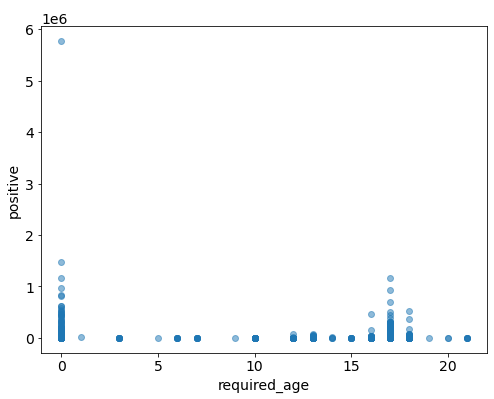

Regression Summary for negative vs. required_age:

                            OLS Regression Results                            
Dep. Variable:               negative   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     318.1
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           5.34e-71
Time:                        15:49:33   Log-Likelihood:            -7.6169e+05
No. Observations:               76987   AIC:                         1.523e+06
Df Residuals:                   76985   BIC:                         1.523e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

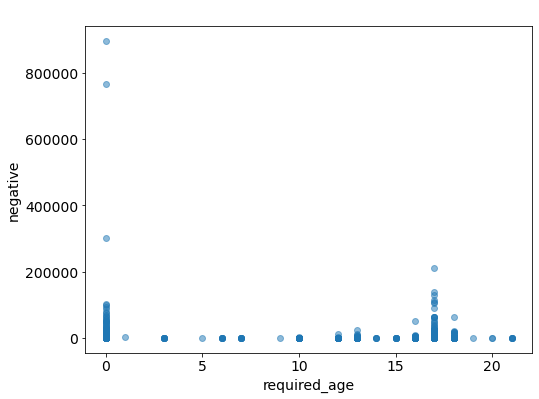

Regression Summary for achievements vs. required_age:

                            OLS Regression Results                            
Dep. Variable:           achievements   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.525
Date:                Thu, 24 Aug 2023   Prob (F-statistic):              0.217
Time:                        15:49:33   Log-Likelihood:            -5.0869e+05
No. Observations:               76987   AIC:                         1.017e+06
Df Residuals:                   76985   BIC:                         1.017e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

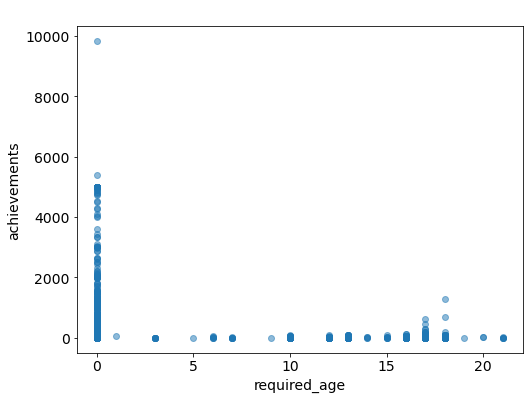

Regression Summary for recommendations vs. required_age:

                            OLS Regression Results                            
Dep. Variable:        recommendations   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     736.0
Date:                Thu, 24 Aug 2023   Prob (F-statistic):          2.55e-161
Time:                        15:49:33   Log-Likelihood:            -8.6655e+05
No. Observations:               76987   AIC:                         1.733e+06
Df Residuals:                   76985   BIC:                         1.733e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

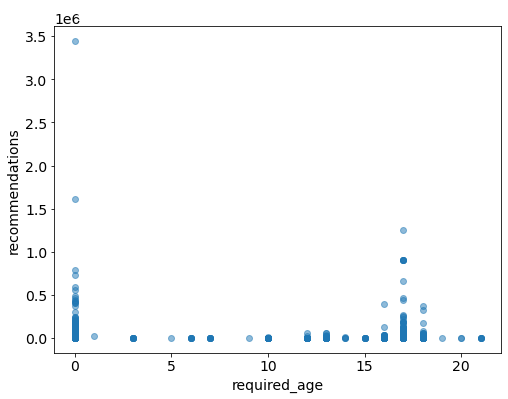

Regression Summary for average_playtime_forever vs. required_age:

                               OLS Regression Results                               
Dep. Variable:     average_playtime_forever   R-squared:                       0.002
Model:                                  OLS   Adj. R-squared:                  0.002
Method:                       Least Squares   F-statistic:                     186.3
Date:                      Thu, 24 Aug 2023   Prob (F-statistic):           2.27e-42
Time:                              15:49:33   Log-Likelihood:            -6.5420e+05
No. Observations:                     76987   AIC:                         1.308e+06
Df Residuals:                         76985   BIC:                         1.308e+06
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--

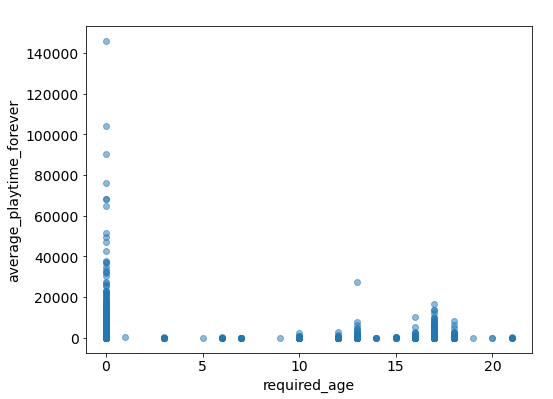

Regression Summary for average_playtime_two_weeks vs. required_age:

                                OLS Regression Results                                
Dep. Variable:     average_playtime_two_weeks   R-squared:                       0.003
Model:                                    OLS   Adj. R-squared:                  0.003
Method:                         Least Squares   F-statistic:                     241.1
Date:                        Thu, 24 Aug 2023   Prob (F-statistic):           2.69e-54
Time:                                15:49:33   Log-Likelihood:            -5.1598e+05
No. Observations:                       76987   AIC:                         1.032e+06
Df Residuals:                           76985   BIC:                         1.032e+06
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                   coef    std err          t      P>|t|     

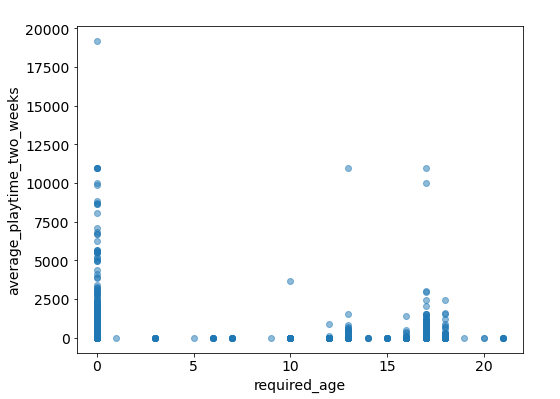

Regression Summary for median_playtime_forever vs. required_age:

                               OLS Regression Results                              
Dep. Variable:     median_playtime_forever   R-squared:                       0.000
Model:                                 OLS   Adj. R-squared:                  0.000
Method:                      Least Squares   F-statistic:                     24.27
Date:                     Thu, 24 Aug 2023   Prob (F-statistic):           8.37e-07
Time:                             15:49:33   Log-Likelihood:            -6.7647e+05
No. Observations:                    76987   AIC:                         1.353e+06
Df Residuals:                        76985   BIC:                         1.353e+06
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------

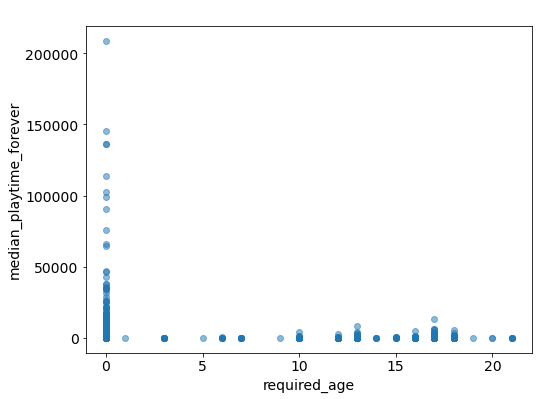

Regression Summary for median_playtime_two_weeks vs. required_age:

                                OLS Regression Results                               
Dep. Variable:     median_playtime_two_weeks   R-squared:                       0.003
Model:                                   OLS   Adj. R-squared:                  0.003
Method:                        Least Squares   F-statistic:                     213.7
Date:                       Thu, 24 Aug 2023   Prob (F-statistic):           2.45e-48
Time:                               15:49:34   Log-Likelihood:            -5.2226e+05
No. Observations:                      76987   AIC:                         1.045e+06
Df Residuals:                          76985   BIC:                         1.045e+06
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                   coef    std err          t      P>|t|      [0.025    

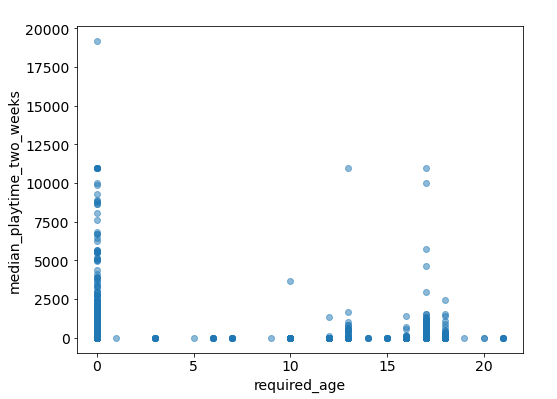

Regression Summary for dlc_count vs. price:

                            OLS Regression Results                            
Dep. Variable:              dlc_count   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     185.3
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           3.76e-42
Time:                        15:49:34   Log-Likelihood:            -3.1457e+05
No. Observations:               76987   AIC:                         6.291e+05
Df Residuals:                   76985   BIC:                         6.292e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

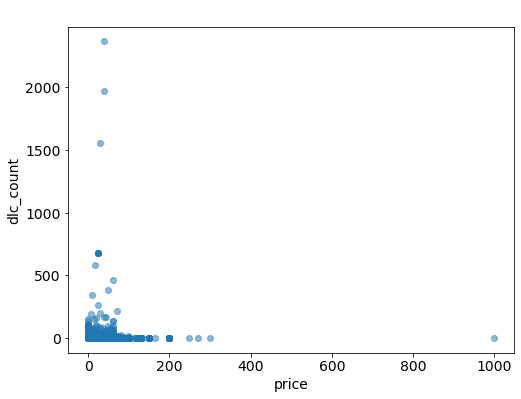

Regression Summary for metacritic_score vs. price:

                            OLS Regression Results                            
Dep. Variable:       metacritic_score   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     2184.
Date:                Thu, 24 Aug 2023   Prob (F-statistic):               0.00
Time:                        15:49:34   Log-Likelihood:            -3.2125e+05
No. Observations:               76987   AIC:                         6.425e+05
Df Residuals:                   76985   BIC:                         6.425e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


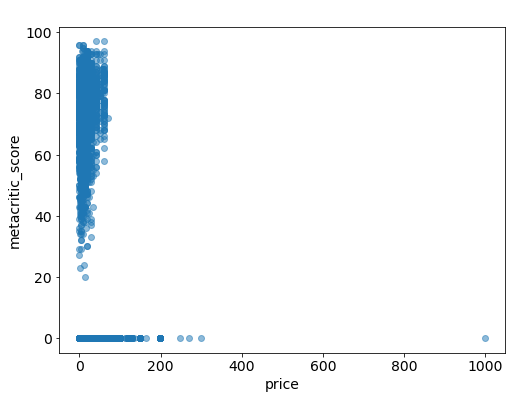

Regression Summary for user_score vs. price:

                            OLS Regression Results                            
Dep. Variable:             user_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                 0.0009557
Date:                Thu, 24 Aug 2023   Prob (F-statistic):              0.975
Time:                        15:49:34   Log-Likelihood:            -1.5598e+05
No. Observations:               76987   AIC:                         3.120e+05
Df Residuals:                   76985   BIC:                         3.120e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

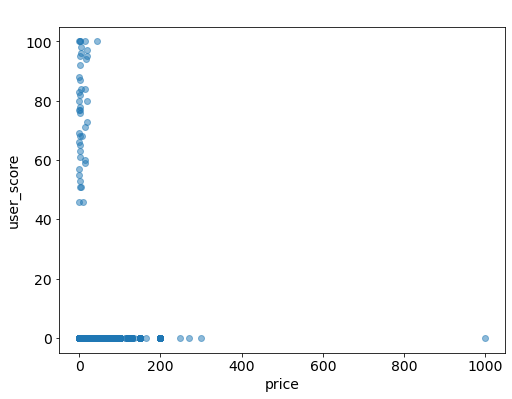

Regression Summary for positive vs. price:

                            OLS Regression Results                            
Dep. Variable:               positive   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     86.83
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           1.21e-20
Time:                        15:49:34   Log-Likelihood:            -8.9064e+05
No. Observations:               76987   AIC:                         1.781e+06
Df Residuals:                   76985   BIC:                         1.781e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

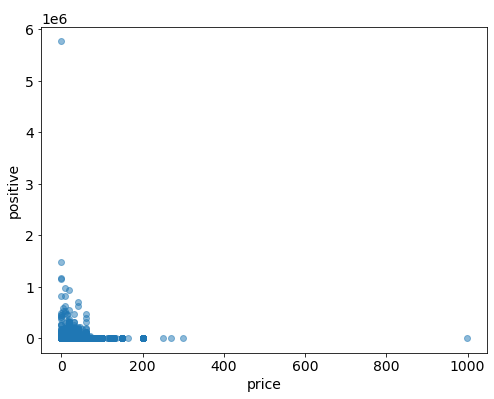

Regression Summary for negative vs. price:

                            OLS Regression Results                            
Dep. Variable:               negative   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     58.95
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           1.64e-14
Time:                        15:49:34   Log-Likelihood:            -7.6181e+05
No. Observations:               76987   AIC:                         1.524e+06
Df Residuals:                   76985   BIC:                         1.524e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

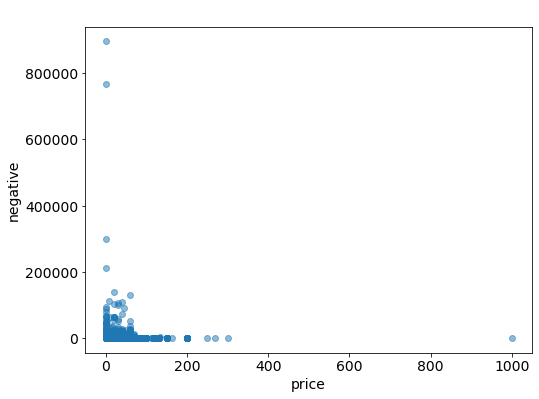

Regression Summary for achievements vs. price:

                            OLS Regression Results                            
Dep. Variable:           achievements   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.904
Date:                Thu, 24 Aug 2023   Prob (F-statistic):             0.0482
Time:                        15:49:34   Log-Likelihood:            -5.0869e+05
No. Observations:               76987   AIC:                         1.017e+06
Df Residuals:                   76985   BIC:                         1.017e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

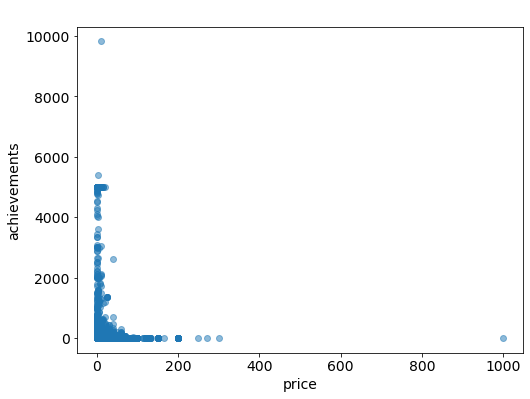

Regression Summary for recommendations vs. price:

                            OLS Regression Results                            
Dep. Variable:        recommendations   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     185.2
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           3.97e-42
Time:                        15:49:34   Log-Likelihood:            -8.6682e+05
No. Observations:               76987   AIC:                         1.734e+06
Df Residuals:                   76985   BIC:                         1.734e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

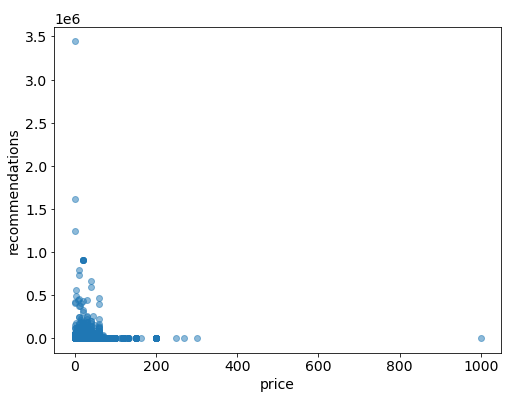

Regression Summary for average_playtime_forever vs. price:

                               OLS Regression Results                               
Dep. Variable:     average_playtime_forever   R-squared:                       0.005
Model:                                  OLS   Adj. R-squared:                  0.005
Method:                       Least Squares   F-statistic:                     409.9
Date:                      Thu, 24 Aug 2023   Prob (F-statistic):           6.79e-91
Time:                              15:49:34   Log-Likelihood:            -6.5409e+05
No. Observations:                     76987   AIC:                         1.308e+06
Df Residuals:                         76985   BIC:                         1.308e+06
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

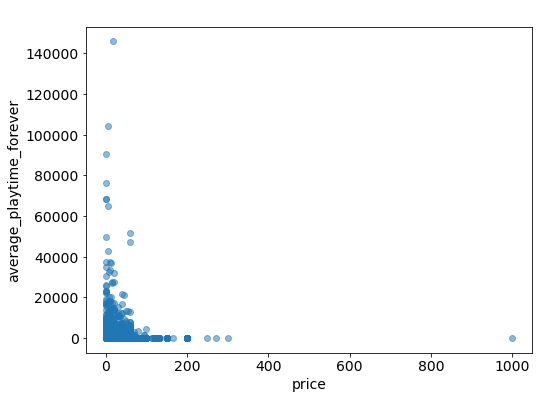

Regression Summary for average_playtime_two_weeks vs. price:

                                OLS Regression Results                                
Dep. Variable:     average_playtime_two_weeks   R-squared:                       0.005
Model:                                    OLS   Adj. R-squared:                  0.005
Method:                         Least Squares   F-statistic:                     396.3
Date:                        Thu, 24 Aug 2023   Prob (F-statistic):           5.90e-88
Time:                                15:49:34   Log-Likelihood:            -5.1590e+05
No. Observations:                       76987   AIC:                         1.032e+06
Df Residuals:                           76985   BIC:                         1.032e+06
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025  

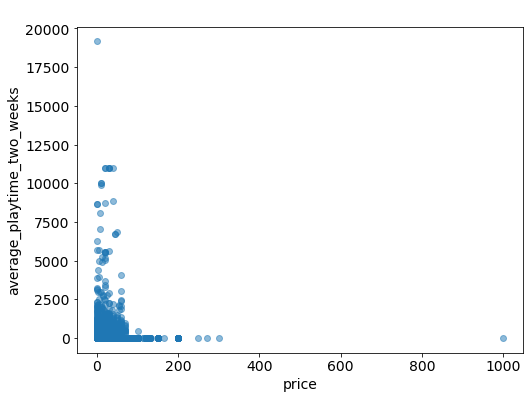

Regression Summary for median_playtime_forever vs. price:

                               OLS Regression Results                              
Dep. Variable:     median_playtime_forever   R-squared:                       0.002
Model:                                 OLS   Adj. R-squared:                  0.002
Method:                      Least Squares   F-statistic:                     170.0
Date:                     Thu, 24 Aug 2023   Prob (F-statistic):           8.18e-39
Time:                             15:49:34   Log-Likelihood:            -6.7639e+05
No. Observations:                    76987   AIC:                         1.353e+06
Df Residuals:                        76985   BIC:                         1.353e+06
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------

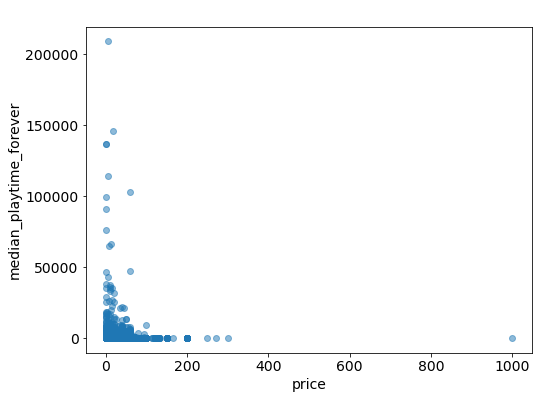

Regression Summary for median_playtime_two_weeks vs. price:

                                OLS Regression Results                               
Dep. Variable:     median_playtime_two_weeks   R-squared:                       0.005
Model:                                   OLS   Adj. R-squared:                  0.005
Method:                        Least Squares   F-statistic:                     384.0
Date:                       Thu, 24 Aug 2023   Prob (F-statistic):           2.76e-85
Time:                               15:49:35   Log-Likelihood:            -5.2218e+05
No. Observations:                      76987   AIC:                         1.044e+06
Df Residuals:                          76985   BIC:                         1.044e+06
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]


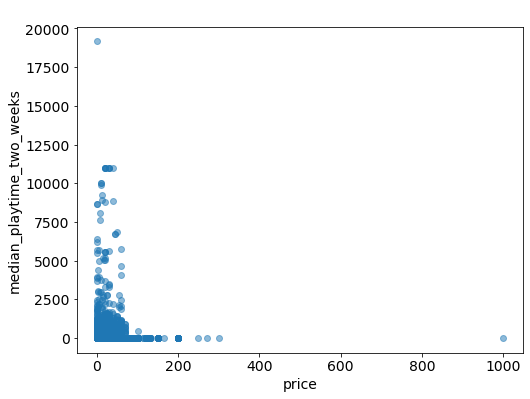

Regression Summary for metacritic_score vs. dlc_count:

                            OLS Regression Results                            
Dep. Variable:       metacritic_score   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     48.83
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           2.81e-12
Time:                        15:49:35   Log-Likelihood:            -3.2231e+05
No. Observations:               76987   AIC:                         6.446e+05
Df Residuals:                   76985   BIC:                         6.446e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

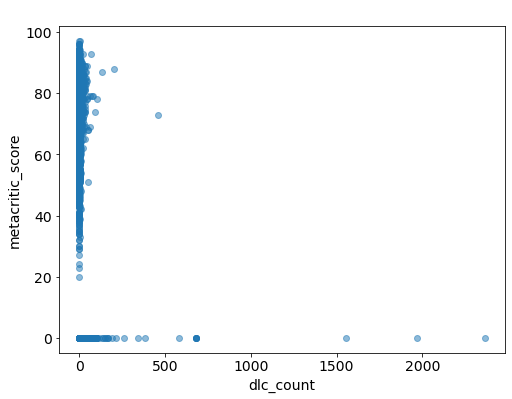

Regression Summary for user_score vs. dlc_count:

                            OLS Regression Results                            
Dep. Variable:             user_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.02949
Date:                Thu, 24 Aug 2023   Prob (F-statistic):              0.864
Time:                        15:49:35   Log-Likelihood:            -1.5598e+05
No. Observations:               76987   AIC:                         3.120e+05
Df Residuals:                   76985   BIC:                         3.120e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

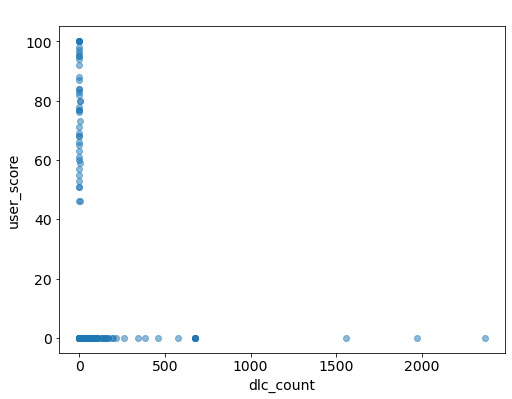

Regression Summary for positive vs. dlc_count:

                            OLS Regression Results                            
Dep. Variable:               positive   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     28.58
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           9.00e-08
Time:                        15:49:35   Log-Likelihood:            -8.9067e+05
No. Observations:               76987   AIC:                         1.781e+06
Df Residuals:                   76985   BIC:                         1.781e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

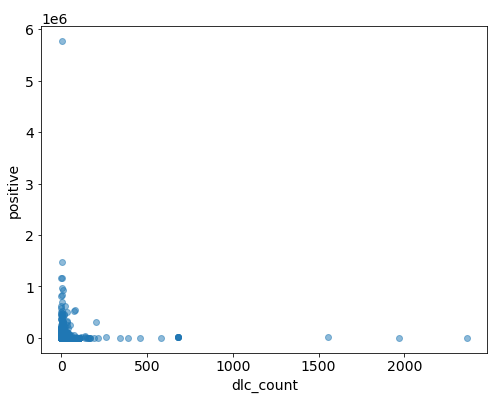

Regression Summary for negative vs. dlc_count:

                            OLS Regression Results                            
Dep. Variable:               negative   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     23.40
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           1.32e-06
Time:                        15:49:35   Log-Likelihood:            -7.6183e+05
No. Observations:               76987   AIC:                         1.524e+06
Df Residuals:                   76985   BIC:                         1.524e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

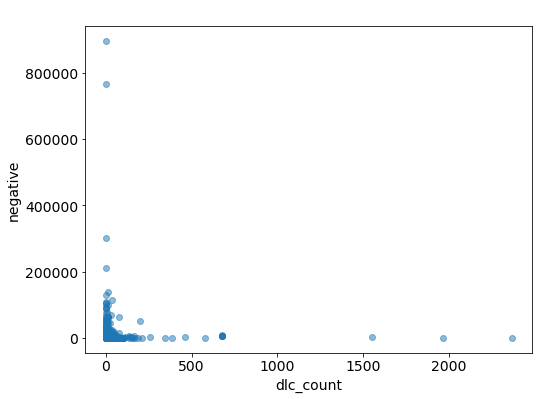

Regression Summary for achievements vs. dlc_count:

                            OLS Regression Results                            
Dep. Variable:           achievements   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     86.01
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           1.84e-20
Time:                        15:49:35   Log-Likelihood:            -5.0865e+05
No. Observations:               76987   AIC:                         1.017e+06
Df Residuals:                   76985   BIC:                         1.017e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


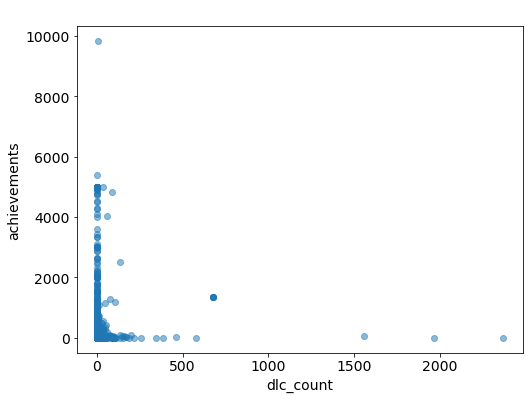

Regression Summary for recommendations vs. dlc_count:

                            OLS Regression Results                            
Dep. Variable:        recommendations   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     37.02
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           1.17e-09
Time:                        15:49:35   Log-Likelihood:            -8.6689e+05
No. Observations:               76987   AIC:                         1.734e+06
Df Residuals:                   76985   BIC:                         1.734e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

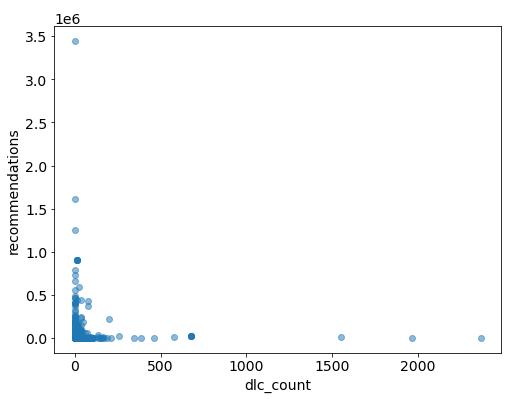

Regression Summary for average_playtime_forever vs. dlc_count:

                               OLS Regression Results                               
Dep. Variable:     average_playtime_forever   R-squared:                       0.001
Model:                                  OLS   Adj. R-squared:                  0.001
Method:                       Least Squares   F-statistic:                     96.81
Date:                      Thu, 24 Aug 2023   Prob (F-statistic):           7.88e-23
Time:                              15:49:35   Log-Likelihood:            -6.5424e+05
No. Observations:                     76987   AIC:                         1.308e+06
Df Residuals:                         76985   BIC:                         1.309e+06
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------

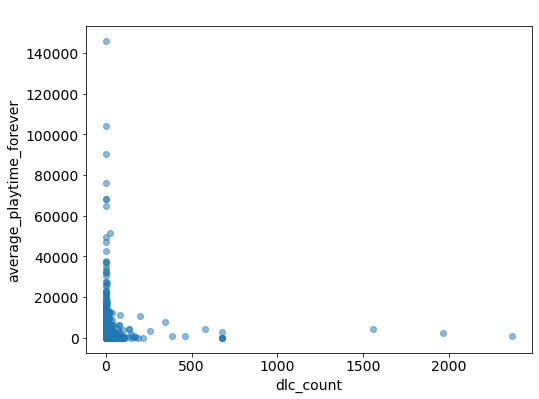

Regression Summary for average_playtime_two_weeks vs. dlc_count:

                                OLS Regression Results                                
Dep. Variable:     average_playtime_two_weeks   R-squared:                       0.000
Model:                                    OLS   Adj. R-squared:                  0.000
Method:                         Least Squares   F-statistic:                     38.40
Date:                        Thu, 24 Aug 2023   Prob (F-statistic):           5.79e-10
Time:                                15:49:35   Log-Likelihood:            -5.1608e+05
No. Observations:                       76987   AIC:                         1.032e+06
Df Residuals:                           76985   BIC:                         1.032e+06
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.0

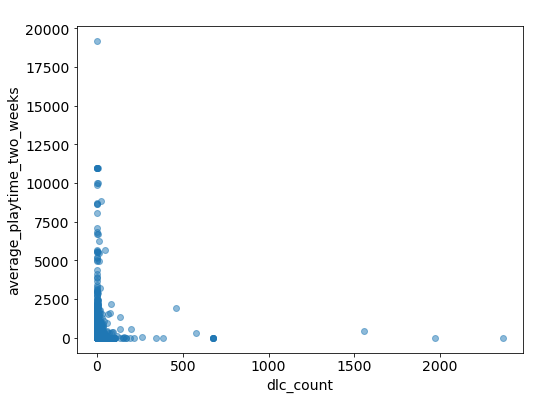

Regression Summary for median_playtime_forever vs. dlc_count:

                               OLS Regression Results                              
Dep. Variable:     median_playtime_forever   R-squared:                       0.000
Model:                                 OLS   Adj. R-squared:                  0.000
Method:                      Least Squares   F-statistic:                     17.67
Date:                     Thu, 24 Aug 2023   Prob (F-statistic):           2.63e-05
Time:                             15:49:35   Log-Likelihood:            -6.7647e+05
No. Observations:                    76987   AIC:                         1.353e+06
Df Residuals:                        76985   BIC:                         1.353e+06
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------

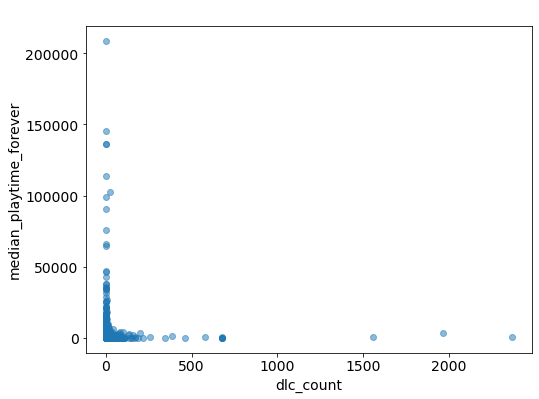

Regression Summary for median_playtime_two_weeks vs. dlc_count:

                                OLS Regression Results                               
Dep. Variable:     median_playtime_two_weeks   R-squared:                       0.000
Model:                                   OLS   Adj. R-squared:                  0.000
Method:                        Least Squares   F-statistic:                     36.58
Date:                       Thu, 24 Aug 2023   Prob (F-statistic):           1.47e-09
Time:                               15:49:35   Log-Likelihood:            -5.2235e+05
No. Observations:                      76987   AIC:                         1.045e+06
Df Residuals:                          76985   BIC:                         1.045e+06
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.9

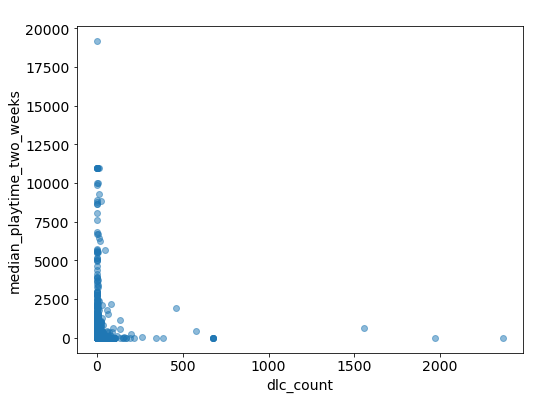

Regression Summary for user_score vs. metacritic_score:

                            OLS Regression Results                            
Dep. Variable:             user_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3258
Date:                Thu, 24 Aug 2023   Prob (F-statistic):              0.568
Time:                        15:49:35   Log-Likelihood:            -1.5598e+05
No. Observations:               76987   AIC:                         3.120e+05
Df Residuals:                   76985   BIC:                         3.120e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

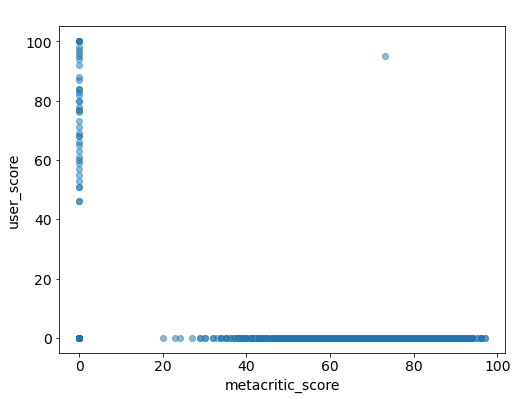

Regression Summary for positive vs. metacritic_score:

                            OLS Regression Results                            
Dep. Variable:               positive   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1124.
Date:                Thu, 24 Aug 2023   Prob (F-statistic):          1.10e-244
Time:                        15:49:36   Log-Likelihood:            -8.9013e+05
No. Observations:               76987   AIC:                         1.780e+06
Df Residuals:                   76985   BIC:                         1.780e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

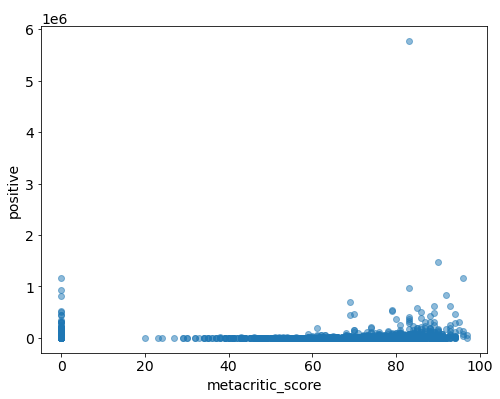

Regression Summary for negative vs. metacritic_score:

                            OLS Regression Results                            
Dep. Variable:               negative   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     498.0
Date:                Thu, 24 Aug 2023   Prob (F-statistic):          5.83e-110
Time:                        15:49:36   Log-Likelihood:            -7.6160e+05
No. Observations:               76987   AIC:                         1.523e+06
Df Residuals:                   76985   BIC:                         1.523e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

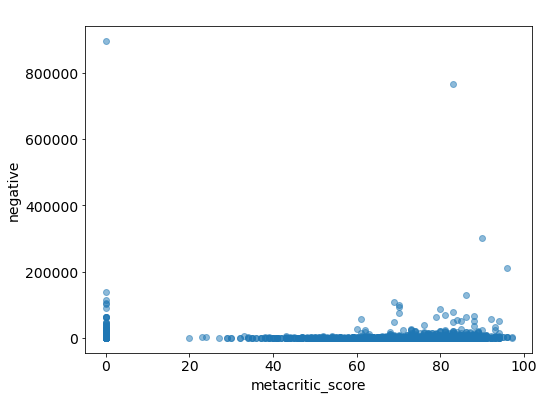

Regression Summary for achievements vs. metacritic_score:

                            OLS Regression Results                            
Dep. Variable:           achievements   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     19.66
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           9.25e-06
Time:                        15:49:36   Log-Likelihood:            -5.0868e+05
No. Observations:               76987   AIC:                         1.017e+06
Df Residuals:                   76985   BIC:                         1.017e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

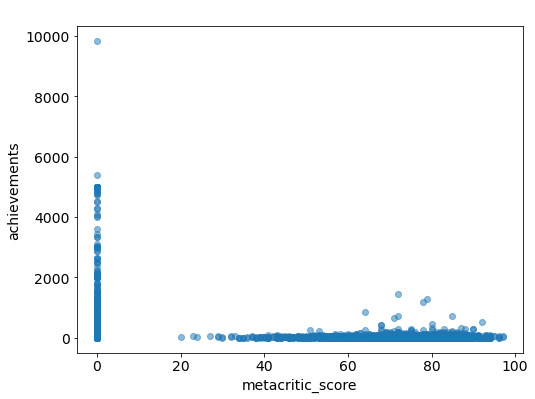

Regression Summary for recommendations vs. metacritic_score:

                            OLS Regression Results                            
Dep. Variable:        recommendations   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1211.
Date:                Thu, 24 Aug 2023   Prob (F-statistic):          2.46e-263
Time:                        15:49:36   Log-Likelihood:            -8.6631e+05
No. Observations:               76987   AIC:                         1.733e+06
Df Residuals:                   76985   BIC:                         1.733e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

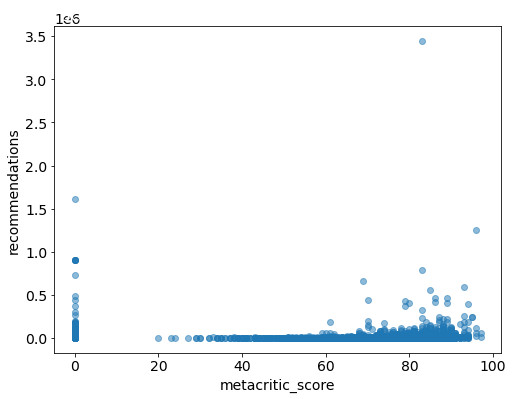

Regression Summary for average_playtime_forever vs. metacritic_score:

                               OLS Regression Results                               
Dep. Variable:     average_playtime_forever   R-squared:                       0.011
Model:                                  OLS   Adj. R-squared:                  0.011
Method:                       Least Squares   F-statistic:                     887.3
Date:                      Thu, 24 Aug 2023   Prob (F-statistic):          7.14e-194
Time:                              15:49:36   Log-Likelihood:            -6.5385e+05
No. Observations:                     76987   AIC:                         1.308e+06
Df Residuals:                         76985   BIC:                         1.308e+06
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0

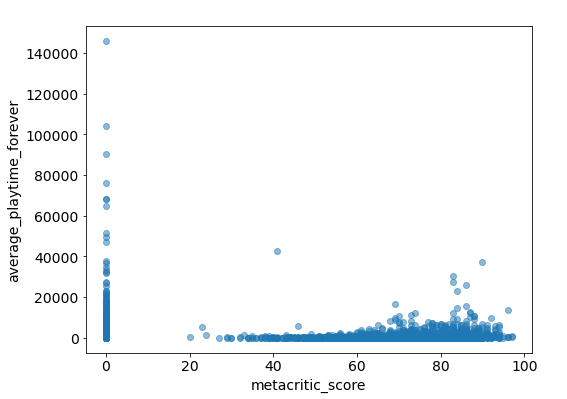

Regression Summary for average_playtime_two_weeks vs. metacritic_score:

                                OLS Regression Results                                
Dep. Variable:     average_playtime_two_weeks   R-squared:                       0.012
Model:                                    OLS   Adj. R-squared:                  0.012
Method:                         Least Squares   F-statistic:                     930.5
Date:                        Thu, 24 Aug 2023   Prob (F-statistic):          3.76e-203
Time:                                15:49:36   Log-Likelihood:            -5.1564e+05
No. Observations:                       76987   AIC:                         1.031e+06
Df Residuals:                           76985   BIC:                         1.031e+06
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                       coef    std err          t      P>

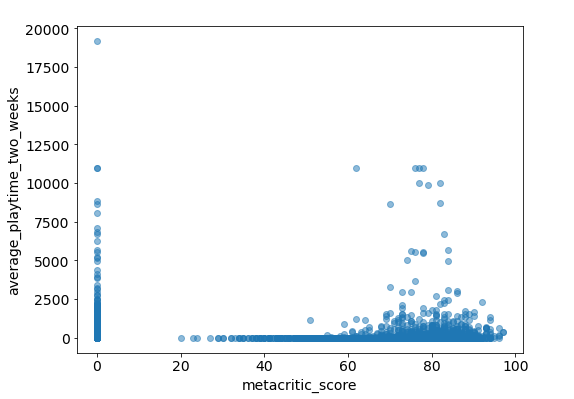

Regression Summary for median_playtime_forever vs. metacritic_score:

                               OLS Regression Results                              
Dep. Variable:     median_playtime_forever   R-squared:                       0.002
Model:                                 OLS   Adj. R-squared:                  0.002
Method:                      Least Squares   F-statistic:                     149.2
Date:                     Thu, 24 Aug 2023   Prob (F-statistic):           2.85e-34
Time:                             15:49:36   Log-Likelihood:            -6.7640e+05
No. Observations:                    76987   AIC:                         1.353e+06
Df Residuals:                        76985   BIC:                         1.353e+06
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----

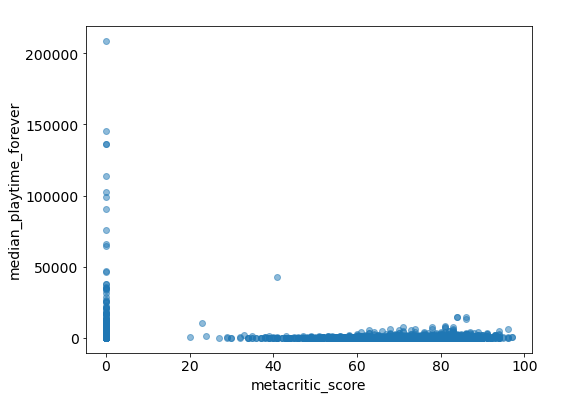

Regression Summary for median_playtime_two_weeks vs. metacritic_score:

                                OLS Regression Results                               
Dep. Variable:     median_playtime_two_weeks   R-squared:                       0.011
Model:                                   OLS   Adj. R-squared:                  0.011
Method:                        Least Squares   F-statistic:                     889.5
Date:                       Thu, 24 Aug 2023   Prob (F-statistic):          2.47e-194
Time:                               15:49:36   Log-Likelihood:            -5.2192e+05
No. Observations:                      76987   AIC:                         1.044e+06
Df Residuals:                          76985   BIC:                         1.044e+06
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                       coef    std err          t      P>|t|      [0

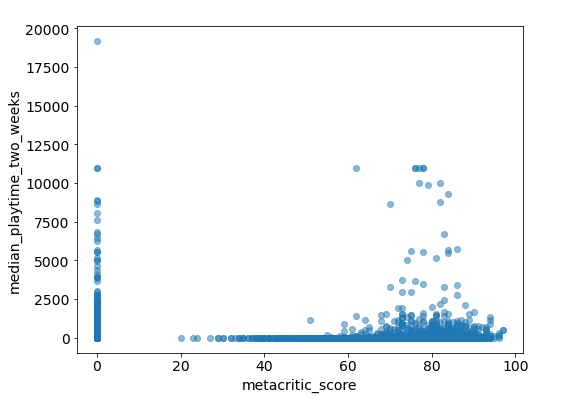

Regression Summary for positive vs. user_score:

                            OLS Regression Results                            
Dep. Variable:               positive   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.04880
Date:                Thu, 24 Aug 2023   Prob (F-statistic):              0.825
Time:                        15:49:36   Log-Likelihood:            -8.9068e+05
No. Observations:               76987   AIC:                         1.781e+06
Df Residuals:                   76985   BIC:                         1.781e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

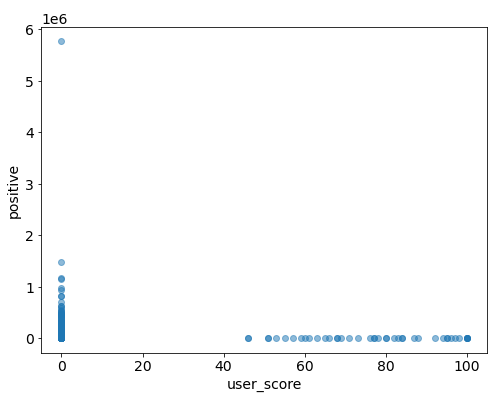

Regression Summary for negative vs. user_score:

                            OLS Regression Results                            
Dep. Variable:               negative   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.03281
Date:                Thu, 24 Aug 2023   Prob (F-statistic):              0.856
Time:                        15:49:36   Log-Likelihood:            -7.6184e+05
No. Observations:               76987   AIC:                         1.524e+06
Df Residuals:                   76985   BIC:                         1.524e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

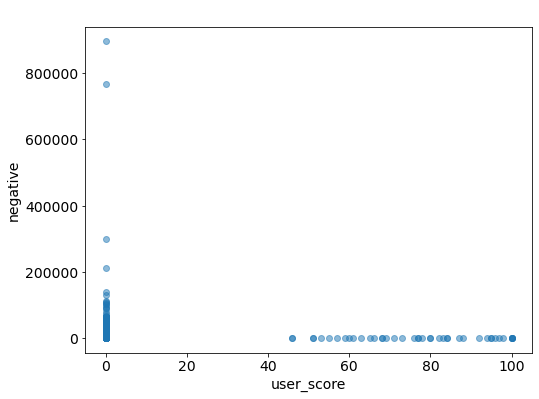

Regression Summary for achievements vs. user_score:

                            OLS Regression Results                            
Dep. Variable:           achievements   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2937
Date:                Thu, 24 Aug 2023   Prob (F-statistic):              0.588
Time:                        15:49:36   Log-Likelihood:            -5.0869e+05
No. Observations:               76987   AIC:                         1.017e+06
Df Residuals:                   76985   BIC:                         1.017e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

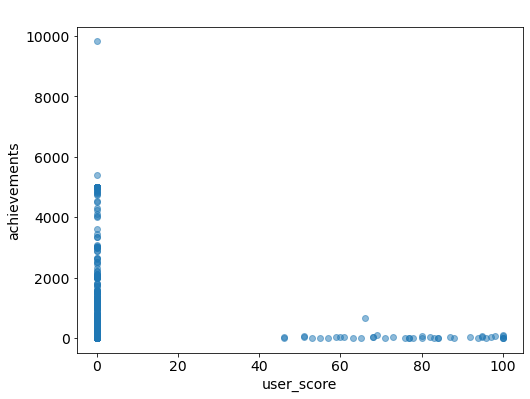

Regression Summary for recommendations vs. user_score:

                            OLS Regression Results                            
Dep. Variable:        recommendations   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.03397
Date:                Thu, 24 Aug 2023   Prob (F-statistic):              0.854
Time:                        15:49:37   Log-Likelihood:            -8.6691e+05
No. Observations:               76987   AIC:                         1.734e+06
Df Residuals:                   76985   BIC:                         1.734e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

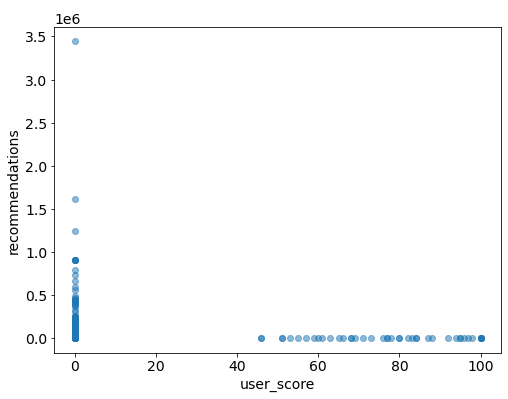

Regression Summary for average_playtime_forever vs. user_score:

                               OLS Regression Results                               
Dep. Variable:     average_playtime_forever   R-squared:                       0.000
Model:                                  OLS   Adj. R-squared:                 -0.000
Method:                       Least Squares   F-statistic:                  0.001355
Date:                      Thu, 24 Aug 2023   Prob (F-statistic):              0.971
Time:                              15:49:37   Log-Likelihood:            -6.5429e+05
No. Observations:                     76987   AIC:                         1.309e+06
Df Residuals:                         76985   BIC:                         1.309e+06
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------

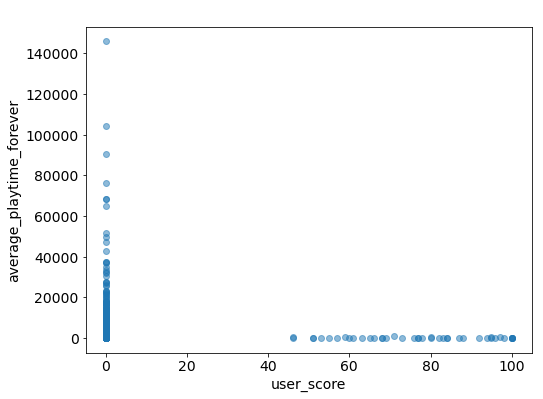

Regression Summary for average_playtime_two_weeks vs. user_score:

                                OLS Regression Results                                
Dep. Variable:     average_playtime_two_weeks   R-squared:                       0.000
Model:                                    OLS   Adj. R-squared:                 -0.000
Method:                         Least Squares   F-statistic:                   0.01157
Date:                        Thu, 24 Aug 2023   Prob (F-statistic):              0.914
Time:                                15:49:37   Log-Likelihood:            -5.1610e+05
No. Observations:                       76987   AIC:                         1.032e+06
Df Residuals:                           76985   BIC:                         1.032e+06
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.

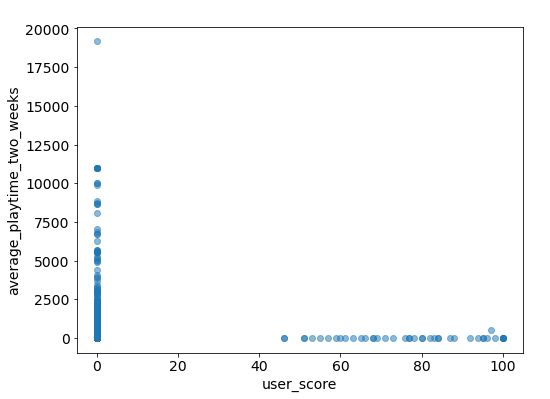

Regression Summary for median_playtime_forever vs. user_score:

                               OLS Regression Results                              
Dep. Variable:     median_playtime_forever   R-squared:                       0.000
Model:                                 OLS   Adj. R-squared:                 -0.000
Method:                      Least Squares   F-statistic:                  0.002449
Date:                     Thu, 24 Aug 2023   Prob (F-statistic):              0.961
Time:                             15:49:37   Log-Likelihood:            -6.7648e+05
No. Observations:                    76987   AIC:                         1.353e+06
Df Residuals:                        76985   BIC:                         1.353e+06
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------

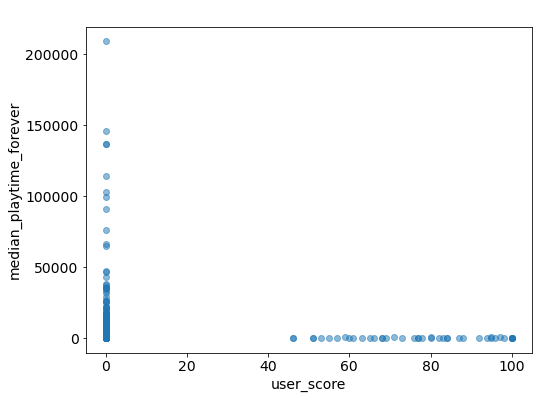

Regression Summary for median_playtime_two_weeks vs. user_score:

                                OLS Regression Results                               
Dep. Variable:     median_playtime_two_weeks   R-squared:                       0.000
Model:                                   OLS   Adj. R-squared:                 -0.000
Method:                        Least Squares   F-statistic:                  0.005662
Date:                       Thu, 24 Aug 2023   Prob (F-statistic):              0.940
Time:                               15:49:37   Log-Likelihood:            -5.2237e+05
No. Observations:                      76987   AIC:                         1.045e+06
Df Residuals:                          76985   BIC:                         1.045e+06
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.

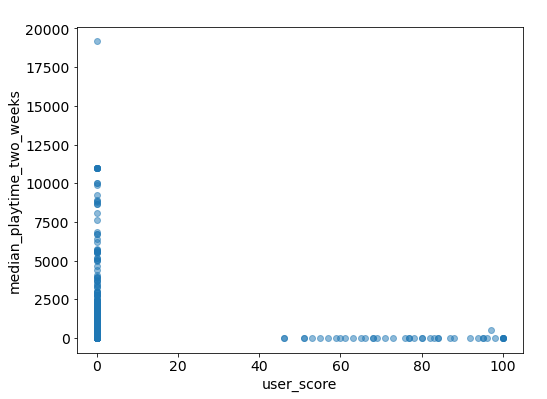

Regression Summary for negative vs. positive:

                            OLS Regression Results                            
Dep. Variable:               negative   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                 1.233e+05
Date:                Thu, 24 Aug 2023   Prob (F-statistic):               0.00
Time:                        15:49:37   Log-Likelihood:            -7.2505e+05
No. Observations:               76987   AIC:                         1.450e+06
Df Residuals:                   76985   BIC:                         1.450e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

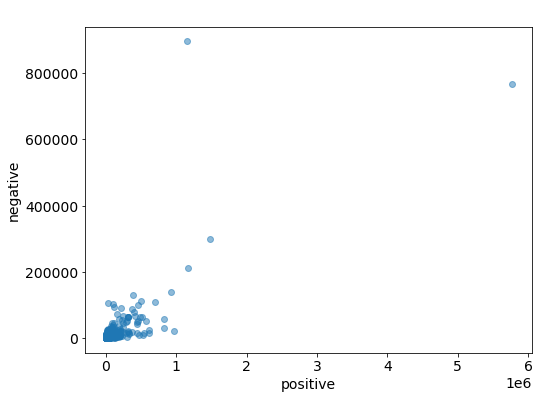

Regression Summary for achievements vs. positive:

                            OLS Regression Results                            
Dep. Variable:           achievements   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     13.78
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           0.000205
Time:                        15:49:37   Log-Likelihood:            -5.0869e+05
No. Observations:               76987   AIC:                         1.017e+06
Df Residuals:                   76985   BIC:                         1.017e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

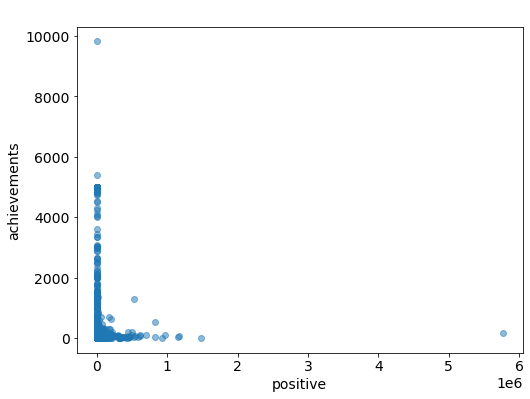

Regression Summary for recommendations vs. positive:

                            OLS Regression Results                            
Dep. Variable:        recommendations   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                 3.153e+05
Date:                Thu, 24 Aug 2023   Prob (F-statistic):               0.00
Time:                        15:49:37   Log-Likelihood:            -8.0423e+05
No. Observations:               76987   AIC:                         1.608e+06
Df Residuals:                   76985   BIC:                         1.608e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

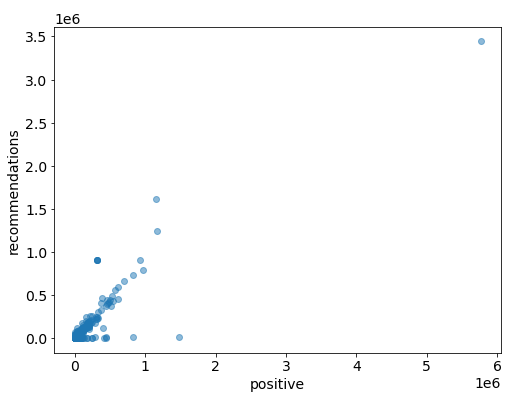

Regression Summary for average_playtime_forever vs. positive:

                               OLS Regression Results                               
Dep. Variable:     average_playtime_forever   R-squared:                       0.042
Model:                                  OLS   Adj. R-squared:                  0.042
Method:                       Least Squares   F-statistic:                     3386.
Date:                      Thu, 24 Aug 2023   Prob (F-statistic):               0.00
Time:                              15:49:37   Log-Likelihood:            -6.5263e+05
No. Observations:                     76987   AIC:                         1.305e+06
Df Residuals:                         76985   BIC:                         1.305e+06
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------

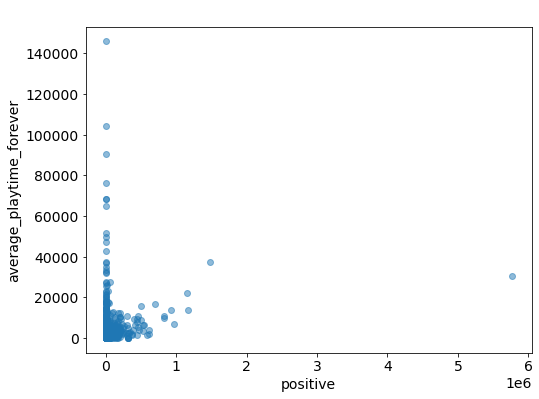

Regression Summary for average_playtime_two_weeks vs. positive:

                                OLS Regression Results                                
Dep. Variable:     average_playtime_two_weeks   R-squared:                       0.010
Model:                                    OLS   Adj. R-squared:                  0.010
Method:                         Least Squares   F-statistic:                     776.1
Date:                        Thu, 24 Aug 2023   Prob (F-statistic):          5.99e-170
Time:                                15:49:37   Log-Likelihood:            -5.1571e+05
No. Observations:                       76987   AIC:                         1.031e+06
Df Residuals:                           76985   BIC:                         1.031e+06
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.02

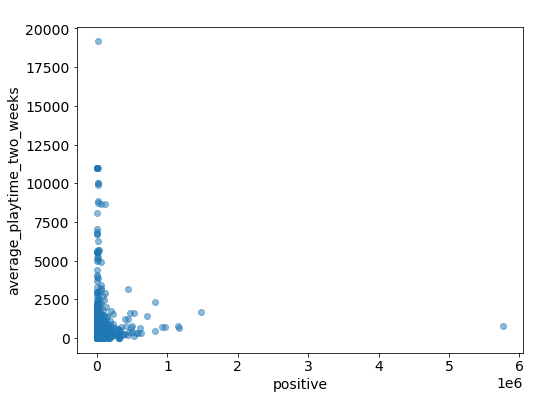

Regression Summary for median_playtime_forever vs. positive:

                               OLS Regression Results                              
Dep. Variable:     median_playtime_forever   R-squared:                       0.001
Model:                                 OLS   Adj. R-squared:                  0.001
Method:                      Least Squares   F-statistic:                     91.69
Date:                     Thu, 24 Aug 2023   Prob (F-statistic):           1.04e-21
Time:                             15:49:38   Log-Likelihood:            -6.7643e+05
No. Observations:                    76987   AIC:                         1.353e+06
Df Residuals:                        76985   BIC:                         1.353e+06
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------

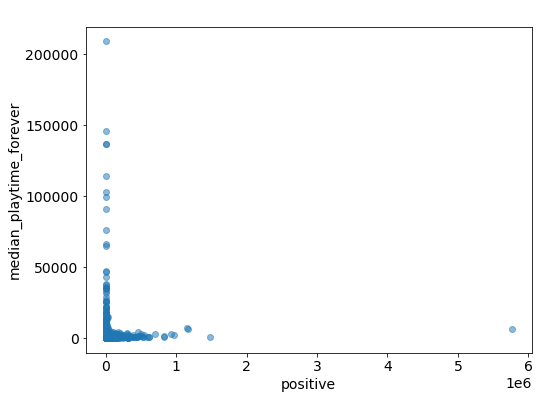

Regression Summary for median_playtime_two_weeks vs. positive:

                                OLS Regression Results                               
Dep. Variable:     median_playtime_two_weeks   R-squared:                       0.004
Model:                                   OLS   Adj. R-squared:                  0.004
Method:                        Least Squares   F-statistic:                     277.8
Date:                       Thu, 24 Aug 2023   Prob (F-statistic):           2.97e-62
Time:                               15:49:38   Log-Likelihood:            -5.2223e+05
No. Observations:                      76987   AIC:                         1.044e+06
Df Residuals:                          76985   BIC:                         1.044e+06
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.97

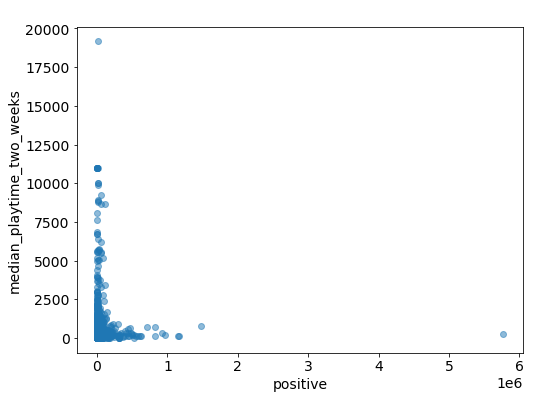

Regression Summary for achievements vs. negative:

                            OLS Regression Results                            
Dep. Variable:           achievements   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     7.175
Date:                Thu, 24 Aug 2023   Prob (F-statistic):            0.00740
Time:                        15:49:38   Log-Likelihood:            -5.0869e+05
No. Observations:               76987   AIC:                         1.017e+06
Df Residuals:                   76985   BIC:                         1.017e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

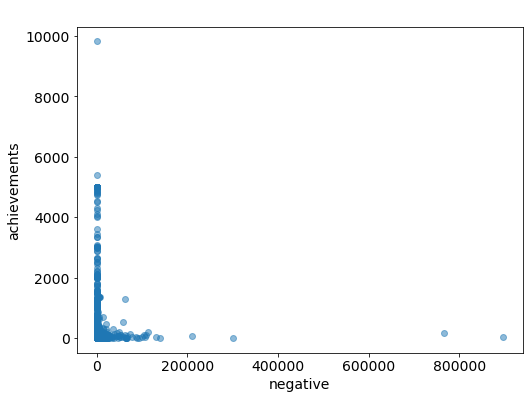

Regression Summary for recommendations vs. negative:

                            OLS Regression Results                            
Dep. Variable:        recommendations   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                 1.306e+05
Date:                Thu, 24 Aug 2023   Prob (F-statistic):               0.00
Time:                        15:49:38   Log-Likelihood:            -8.2872e+05
No. Observations:               76987   AIC:                         1.657e+06
Df Residuals:                   76985   BIC:                         1.657e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

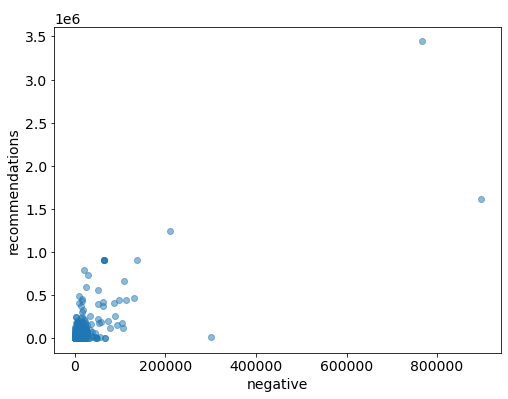

Regression Summary for average_playtime_forever vs. negative:

                               OLS Regression Results                               
Dep. Variable:     average_playtime_forever   R-squared:                       0.038
Model:                                  OLS   Adj. R-squared:                  0.038
Method:                       Least Squares   F-statistic:                     3038.
Date:                      Thu, 24 Aug 2023   Prob (F-statistic):               0.00
Time:                              15:49:38   Log-Likelihood:            -6.5280e+05
No. Observations:                     76987   AIC:                         1.306e+06
Df Residuals:                         76985   BIC:                         1.306e+06
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------

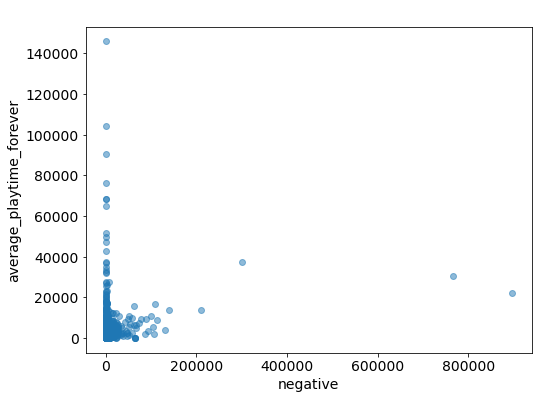

Regression Summary for average_playtime_two_weeks vs. negative:

                                OLS Regression Results                                
Dep. Variable:     average_playtime_two_weeks   R-squared:                       0.009
Model:                                    OLS   Adj. R-squared:                  0.009
Method:                         Least Squares   F-statistic:                     689.6
Date:                        Thu, 24 Aug 2023   Prob (F-statistic):          2.57e-151
Time:                                15:49:38   Log-Likelihood:            -5.1576e+05
No. Observations:                       76987   AIC:                         1.032e+06
Df Residuals:                           76985   BIC:                         1.032e+06
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.02

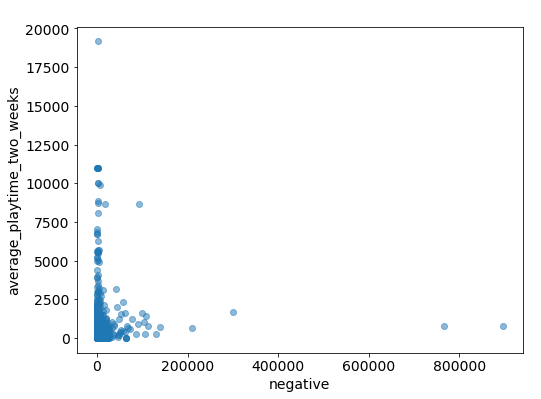

Regression Summary for median_playtime_forever vs. negative:

                               OLS Regression Results                              
Dep. Variable:     median_playtime_forever   R-squared:                       0.001
Model:                                 OLS   Adj. R-squared:                  0.001
Method:                      Least Squares   F-statistic:                     96.35
Date:                     Thu, 24 Aug 2023   Prob (F-statistic):           9.92e-23
Time:                             15:49:38   Log-Likelihood:            -6.7643e+05
No. Observations:                    76987   AIC:                         1.353e+06
Df Residuals:                        76985   BIC:                         1.353e+06
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------

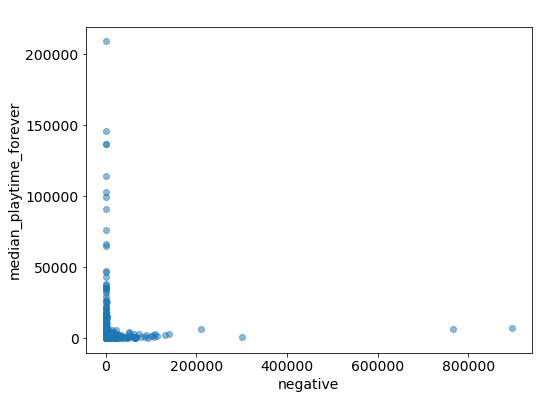

Regression Summary for median_playtime_two_weeks vs. negative:

                                OLS Regression Results                               
Dep. Variable:     median_playtime_two_weeks   R-squared:                       0.003
Model:                                   OLS   Adj. R-squared:                  0.003
Method:                        Least Squares   F-statistic:                     258.5
Date:                       Thu, 24 Aug 2023   Prob (F-statistic):           4.64e-58
Time:                               15:49:38   Log-Likelihood:            -5.2224e+05
No. Observations:                      76987   AIC:                         1.044e+06
Df Residuals:                          76985   BIC:                         1.044e+06
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.97

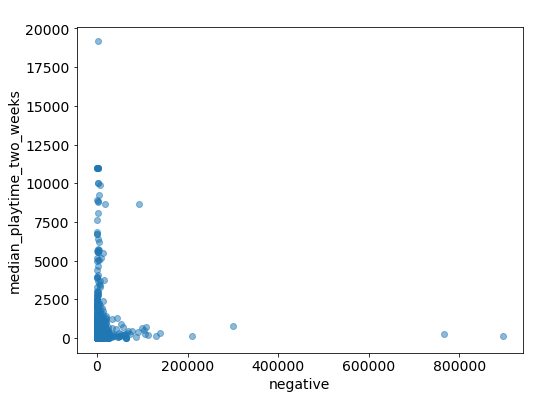

Regression Summary for recommendations vs. achievements:

                            OLS Regression Results                            
Dep. Variable:        recommendations   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     12.90
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           0.000329
Time:                        15:49:38   Log-Likelihood:            -8.6691e+05
No. Observations:               76987   AIC:                         1.734e+06
Df Residuals:                   76985   BIC:                         1.734e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

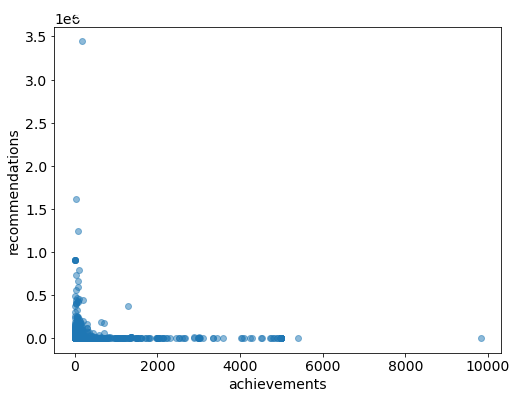

Regression Summary for average_playtime_forever vs. achievements:

                               OLS Regression Results                               
Dep. Variable:     average_playtime_forever   R-squared:                       0.000
Model:                                  OLS   Adj. R-squared:                  0.000
Method:                       Least Squares   F-statistic:                     14.21
Date:                      Thu, 24 Aug 2023   Prob (F-statistic):           0.000163
Time:                              15:49:38   Log-Likelihood:            -6.5428e+05
No. Observations:                     76987   AIC:                         1.309e+06
Df Residuals:                         76985   BIC:                         1.309e+06
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--

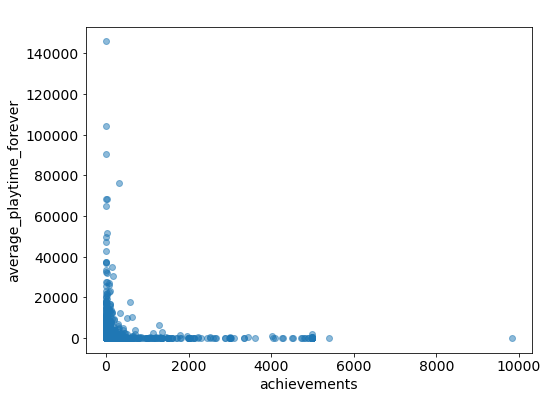

Regression Summary for average_playtime_two_weeks vs. achievements:

                                OLS Regression Results                                
Dep. Variable:     average_playtime_two_weeks   R-squared:                       0.000
Model:                                    OLS   Adj. R-squared:                  0.000
Method:                         Least Squares   F-statistic:                     7.330
Date:                        Thu, 24 Aug 2023   Prob (F-statistic):            0.00678
Time:                                15:49:38   Log-Likelihood:            -5.1610e+05
No. Observations:                       76987   AIC:                         1.032e+06
Df Residuals:                           76985   BIC:                         1.032e+06
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                   coef    std err          t      P>|t|     

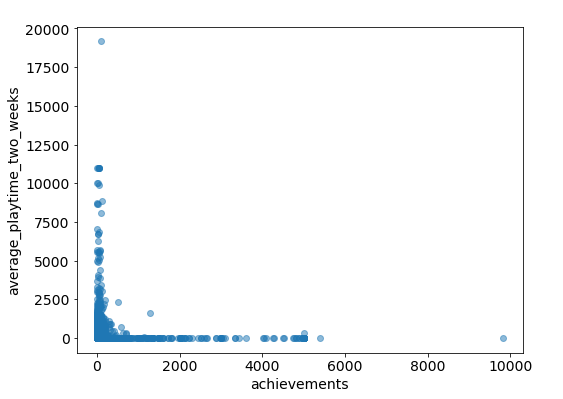

Regression Summary for median_playtime_forever vs. achievements:

                               OLS Regression Results                              
Dep. Variable:     median_playtime_forever   R-squared:                       0.000
Model:                                 OLS   Adj. R-squared:                  0.000
Method:                      Least Squares   F-statistic:                     2.828
Date:                     Thu, 24 Aug 2023   Prob (F-statistic):             0.0926
Time:                             15:49:39   Log-Likelihood:            -6.7648e+05
No. Observations:                    76987   AIC:                         1.353e+06
Df Residuals:                        76985   BIC:                         1.353e+06
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------

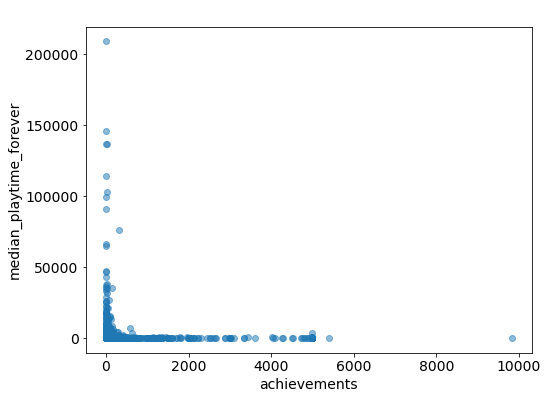

Regression Summary for median_playtime_two_weeks vs. achievements:

                                OLS Regression Results                               
Dep. Variable:     median_playtime_two_weeks   R-squared:                       0.000
Model:                                   OLS   Adj. R-squared:                  0.000
Method:                        Least Squares   F-statistic:                     5.247
Date:                       Thu, 24 Aug 2023   Prob (F-statistic):             0.0220
Time:                               15:49:39   Log-Likelihood:            -5.2236e+05
No. Observations:                      76987   AIC:                         1.045e+06
Df Residuals:                          76985   BIC:                         1.045e+06
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                   coef    std err          t      P>|t|      [0.025    

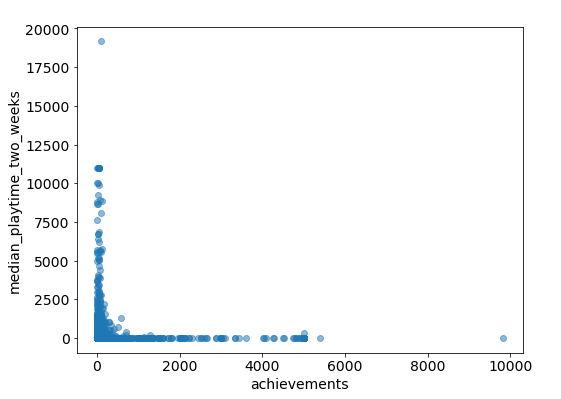

Regression Summary for average_playtime_forever vs. recommendations:

                               OLS Regression Results                               
Dep. Variable:     average_playtime_forever   R-squared:                       0.034
Model:                                  OLS   Adj. R-squared:                  0.034
Method:                       Least Squares   F-statistic:                     2682.
Date:                      Thu, 24 Aug 2023   Prob (F-statistic):               0.00
Time:                              15:49:39   Log-Likelihood:            -6.5297e+05
No. Observations:                     76987   AIC:                         1.306e+06
Df Residuals:                         76985   BIC:                         1.306e+06
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.9

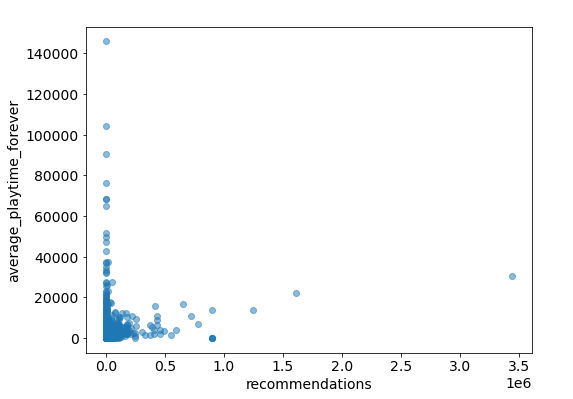

Regression Summary for average_playtime_two_weeks vs. recommendations:

                                OLS Regression Results                                
Dep. Variable:     average_playtime_two_weeks   R-squared:                       0.008
Model:                                    OLS   Adj. R-squared:                  0.008
Method:                         Least Squares   F-statistic:                     626.4
Date:                        Thu, 24 Aug 2023   Prob (F-statistic):          1.06e-137
Time:                                15:49:39   Log-Likelihood:            -5.1579e+05
No. Observations:                       76987   AIC:                         1.032e+06
Df Residuals:                           76985   BIC:                         1.032e+06
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                      coef    std err          t      P>|t

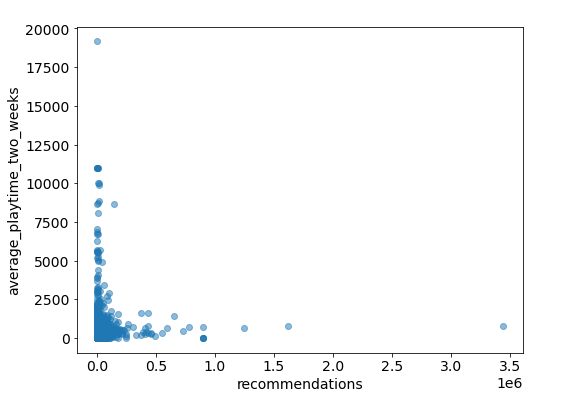

Regression Summary for median_playtime_forever vs. recommendations:

                               OLS Regression Results                              
Dep. Variable:     median_playtime_forever   R-squared:                       0.001
Model:                                 OLS   Adj. R-squared:                  0.001
Method:                      Least Squares   F-statistic:                     115.2
Date:                     Thu, 24 Aug 2023   Prob (F-statistic):           7.25e-27
Time:                             15:49:39   Log-Likelihood:            -6.7642e+05
No. Observations:                    76987   AIC:                         1.353e+06
Df Residuals:                        76985   BIC:                         1.353e+06
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-------

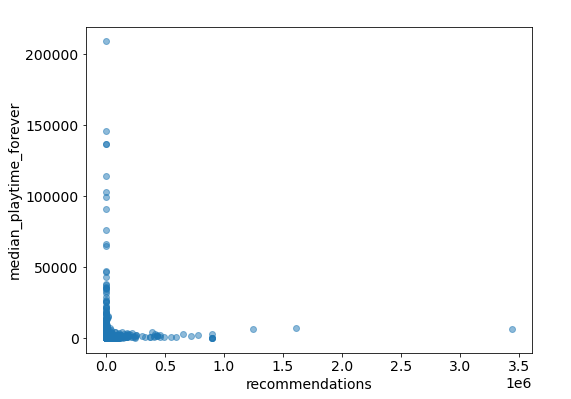

Regression Summary for median_playtime_two_weeks vs. recommendations:

                                OLS Regression Results                               
Dep. Variable:     median_playtime_two_weeks   R-squared:                       0.003
Model:                                   OLS   Adj. R-squared:                  0.003
Method:                        Least Squares   F-statistic:                     261.2
Date:                       Thu, 24 Aug 2023   Prob (F-statistic):           1.17e-58
Time:                               15:49:39   Log-Likelihood:            -5.2224e+05
No. Observations:                      76987   AIC:                         1.044e+06
Df Residuals:                          76985   BIC:                         1.044e+06
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                      coef    std err          t      P>|t|      [0.0

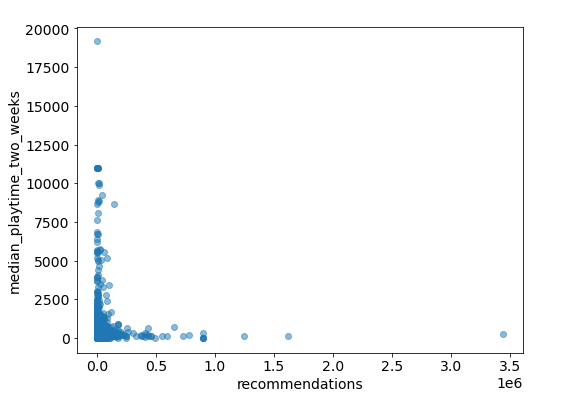

Regression Summary for average_playtime_two_weeks vs. average_playtime_forever:

                                OLS Regression Results                                
Dep. Variable:     average_playtime_two_weeks   R-squared:                       0.025
Model:                                    OLS   Adj. R-squared:                  0.025
Method:                         Least Squares   F-statistic:                     1979.
Date:                        Thu, 24 Aug 2023   Prob (F-statistic):               0.00
Time:                                15:49:39   Log-Likelihood:            -5.1512e+05
No. Observations:                       76987   AIC:                         1.030e+06
Df Residuals:                           76985   BIC:                         1.030e+06
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                               coef    std err   

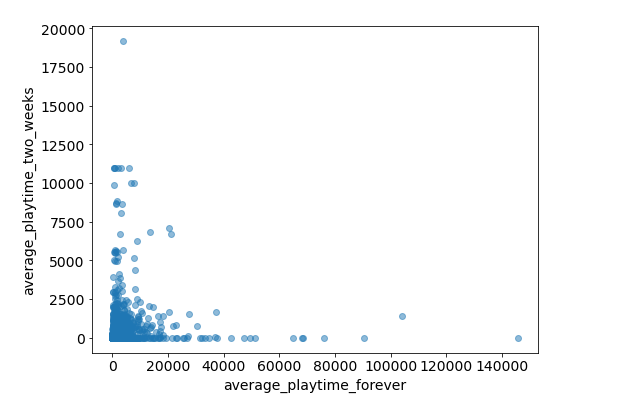

Regression Summary for median_playtime_forever vs. average_playtime_forever:

                               OLS Regression Results                              
Dep. Variable:     median_playtime_forever   R-squared:                       0.793
Model:                                 OLS   Adj. R-squared:                  0.793
Method:                      Least Squares   F-statistic:                 2.955e+05
Date:                     Thu, 24 Aug 2023   Prob (F-statistic):               0.00
Time:                             15:49:39   Log-Likelihood:            -6.1579e+05
No. Observations:                    76987   AIC:                         1.232e+06
Df Residuals:                        76985   BIC:                         1.232e+06
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025  

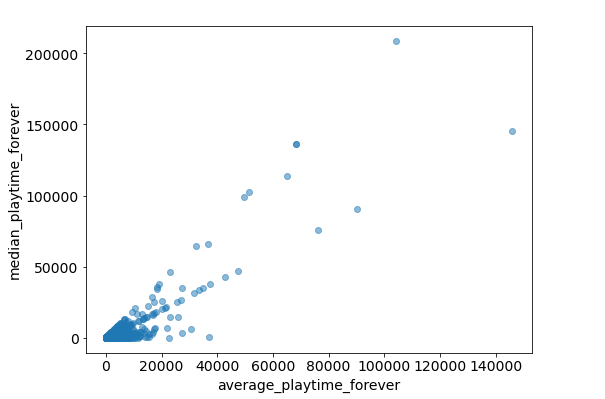

Regression Summary for median_playtime_two_weeks vs. average_playtime_forever:

                                OLS Regression Results                               
Dep. Variable:     median_playtime_two_weeks   R-squared:                       0.020
Model:                                   OLS   Adj. R-squared:                  0.020
Method:                        Least Squares   F-statistic:                     1588.
Date:                       Thu, 24 Aug 2023   Prob (F-statistic):               0.00
Time:                               15:49:39   Log-Likelihood:            -5.2158e+05
No. Observations:                      76987   AIC:                         1.043e+06
Df Residuals:                          76985   BIC:                         1.043e+06
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                               coef    std err          t   

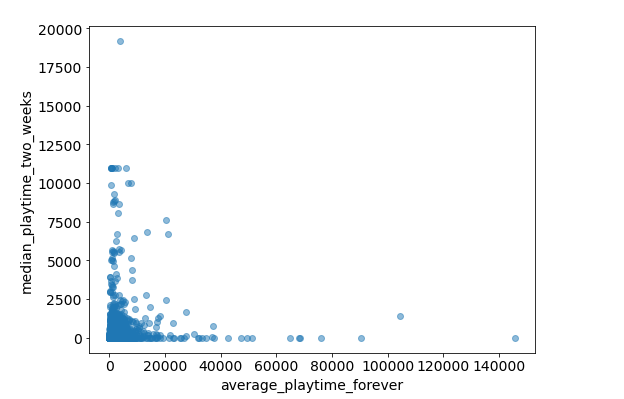

Regression Summary for median_playtime_forever vs. average_playtime_two_weeks:

                               OLS Regression Results                              
Dep. Variable:     median_playtime_forever   R-squared:                       0.005
Model:                                 OLS   Adj. R-squared:                  0.005
Method:                      Least Squares   F-statistic:                     417.7
Date:                     Thu, 24 Aug 2023   Prob (F-statistic):           1.36e-92
Time:                             15:49:39   Log-Likelihood:            -6.7627e+05
No. Observations:                    76987   AIC:                         1.353e+06
Df Residuals:                        76985   BIC:                         1.353e+06
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                                 coef    std err          t      P>|t|      [0.0

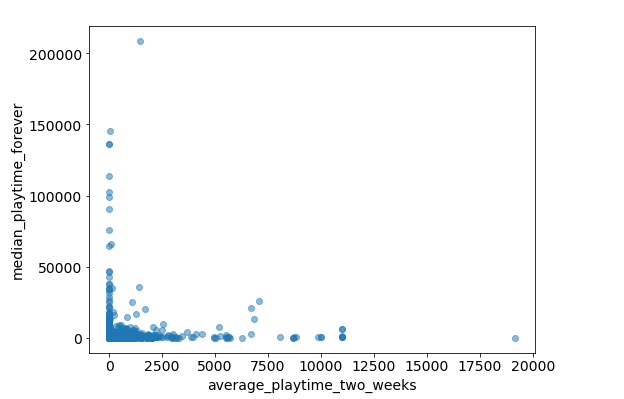

Regression Summary for median_playtime_two_weeks vs. average_playtime_two_weeks:

                                OLS Regression Results                               
Dep. Variable:     median_playtime_two_weeks   R-squared:                       0.946
Model:                                   OLS   Adj. R-squared:                  0.946
Method:                        Least Squares   F-statistic:                 1.342e+06
Date:                       Thu, 24 Aug 2023   Prob (F-statistic):               0.00
Time:                               15:49:39   Log-Likelihood:            -4.1020e+05
No. Observations:                      76987   AIC:                         8.204e+05
Df Residuals:                          76985   BIC:                         8.204e+05
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                                 coef    std err          

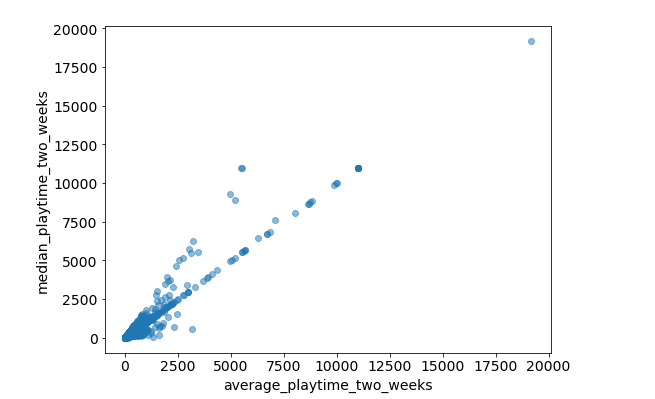

Regression Summary for median_playtime_two_weeks vs. median_playtime_forever:

                                OLS Regression Results                               
Dep. Variable:     median_playtime_two_weeks   R-squared:                       0.005
Model:                                   OLS   Adj. R-squared:                  0.005
Method:                        Least Squares   F-statistic:                     375.5
Date:                       Thu, 24 Aug 2023   Prob (F-statistic):           1.87e-83
Time:                               15:49:40   Log-Likelihood:            -5.2218e+05
No. Observations:                      76987   AIC:                         1.044e+06
Df Residuals:                          76985   BIC:                         1.044e+06
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                              coef    std err          t     

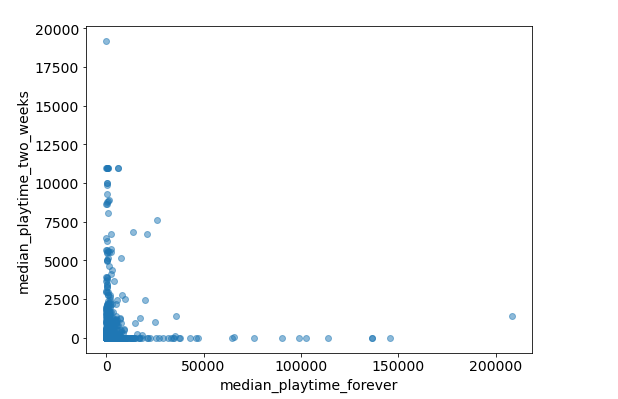

In [33]:
import statsmodels.api as sm
from itertools import combinations


# Get a list of numeric column names
numeric_columns = df_small.select_dtypes(include=['int64', 'float64']).columns

# Iterate through pairs of numeric columns
for independent_variable, dependent_variable in combinations(numeric_columns, 2):
    # Create a scatter plot to visualize the relationship
    plt.figure(figsize=(8, 6))
    plt.scatter(df[independent_variable], df[dependent_variable], alpha=0.5)
    plt.xlabel(independent_variable)
    plt.ylabel(dependent_variable)
    plt.title(f'Scatter Plot: {dependent_variable} vs. {independent_variable}')
    
    # Add a constant term to the independent variable for the regression model
    X = sm.add_constant(df[independent_variable])
    
    # Perform the linear regression
    model = sm.OLS(df[dependent_variable], X).fit()
    
    # Print the regression summary
    print(f"Regression Summary for {dependent_variable} vs. {independent_variable}:\n")
    print(model.summary())
    
    plt.show()


In [34]:
from scipy.stats import chi2_contingency



# Choose two categorical columns for analysis
categorical_column1 = 'supported_languages'
categorical_column2 = 'full_audio_languages'

# Create a contingency table
contingency_table = pd.crosstab(df_small[categorical_column1], df_small[categorical_column2])

# Perform the chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Squared Value: {chi2}")
print(f"P-value: {p_value}")

Chi-Squared Value: 122232433.17955191
P-value: 0.0


In [35]:
from scipy.stats import ttest_ind

# Choose two numeric columns for hypothesis testing
numeric_column1 = 'price'
numeric_column2 = 'peak_ccu'

# Perform the t-test
t_statistic, p_value = ttest_ind(df_small[numeric_column1], df_small[numeric_column2], equal_var=False)

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: -6.531802849066346
P-value: 6.538570696179965e-11


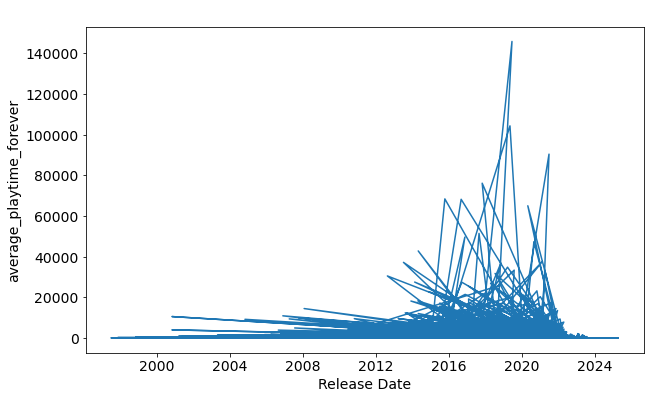

In [36]:
# Convert 'release_date' to datetime if not already done
df_small['release_date'] = pd.to_datetime(df_small['release_date'])

# Set 'release_date' as the index
df_small.set_index('release_date', inplace=True)

# Choose the column for time series analysis
time_series_column = 'average_playtime_forever'

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df_small.index, df_small[time_series_column])
plt.xlabel('Release Date')
plt.ylabel(time_series_column)
plt.title(f'Time Series Analysis: {time_series_column}')
plt.show()


In [37]:
# Choose a numeric column for outlier detection
numeric_column = 'average_playtime_forever'

# Calculate the z-scores for the selected column
z_scores = np.abs((df_small[numeric_column] - df_small[numeric_column].mean()) / df_small[numeric_column].std())

# Define a threshold for outliers (e.g., z-score > 3)
threshold = 3

# Identify outliers based on the threshold
outliers = df_small[z_scores > threshold]

# Print the rows with outliers
display(outliers)

appid                                               name  \
release_date                                                               
2018-02-27     546050                                  Puyo Puyo™Tetris®   
2018-02-14     748490      The Legend of Heroes: Trails of Cold Steel II   
2015-07-23     388080                                  Borderless Gaming   
2020-11-04    1172470                                      Apex Legends™   
2012-12-01     223330  Sea Dogs: To Each His Own - Pirate Open World RPG   
...               ...                                                ...   
2016-02-26     413150                                     Stardew Valley   
2020-04-14    1151340                                         Fallout 76   
2017-09-06     650750                       HYPERNOVA: Escape from Hadea   
2014-11-25     266150                                       Lost Saga NA   
2020-08-17    1366800                                        Crosshair X   

                 estimated_owners  peak_ccu  required_age  price  dlc_count  \
release_date                                                                  
2018-02-27       500000 - 1000000        54             0  19.99          0   
2018-02-14         50000 - 100000        91            13  39.99         13   
2015-07-23        200000 - 500000       570             0   3.99          1   
2020-11-04    20000000 - 50000000    235067             0   0.00          2   
2012-12-01        100000 - 200000       131             0  14.99          5   
...                           ...       ...           ...    ...        ...   
2016-02-26    10000000 - 20000000     39710             0  14.99          1   
2020-04-14      2000000 - 5000000      9134            17  39.99          3   
2017-09-06          20000 - 50000         1             0  11.99          0   
2014-11-25        200000 - 500000         1             0   0.00          0   
2020-08-17        200000 - 500000      2514             0   3.99          0   

                                            supported_languages  \
release_date                                                      
2018-02-27                                          ['English']   
2018-02-14                              ['English', 'Japanese']   
2015-07-23    ['English', 'German', 'Russian', 'French', 'Si...   
2020-11-04    ['English', 'French', 'Italian', 'German', 'Sp...   
2012-12-01                               ['Russian', 'English']   
...                                                         ...   
2016-02-26    ['English', 'German', 'Spanish - Spain', 'Japa...   
2020-04-14    ['English', 'French', 'Italian', 'German', 'Sp...   
2017-09-06    ['English', 'Spanish - Spain', 'Russian', 'Sim...   
2014-11-25                                          ['English']   
2020-08-17    ['English', 'German', 'Portuguese - Brazil', '...   

                                           full_audio_languages  \
release_date                                                      
2018-02-27                                          ['English']   
2018-02-14                              ['English', 'Japanese']   
2015-07-23                                                   []   
2020-11-04    ['English', 'French', 'Italian', 'German', 'Sp...   
2012-12-01                               ['Russian', 'English']   
...                                                         ...   
2016-02-26                                                   []   
2020-04-14    ['English', 'French', 'Italian', 'German', 'Sp...   
2017-09-06                               ['English', 'Italian']   
2014-11-25                                                   []   
2020-08-17    ['English', 'German', 'Portuguese - Brazil', '...   

                                                   header_image  windows  \
release_date                                                               
2018-02-27    https://cdn.akamai.steamstatic.com/steam/apps/...     True   
2018-02-14    https://cdn.a

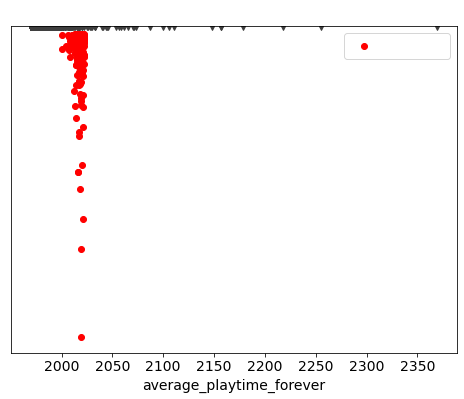

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



# Choose a numeric column for outlier detection
numeric_column = 'average_playtime_forever'

# Calculate the z-scores for the selected column
z_scores = np.abs((df_small[numeric_column] - df_small[numeric_column].mean()) / df_small[numeric_column].std())

# Define a threshold for outliers (e.g., z-score > 3)
threshold = 3

# Create a box plot with highlighted outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_small[numeric_column])
plt.scatter(x=z_scores[z_scores > threshold].index, y=df_small[numeric_column][z_scores > threshold], c='red', label='Outliers')
plt.xlabel(numeric_column)
plt.title(f'Box Plot of {numeric_column} with Outliers')
plt.legend()
plt.show()


In [39]:

import scipy.stats as stats


# Choose a categorical column and a numeric column for ANOVA
categorical_column = 'supported_languages'
numeric_column = 'average_playtime_forever'

# Perform the ANOVA test
groups = df_small.groupby(categorical_column)[numeric_column].apply(list)
f_statistic, p_value = stats.f_oneway(*groups)

# Print the results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


F-statistic: 6.431831694541113
P-value: 0.0


The F-statistic and p-value are important outputs of an ANOVA (Analysis of Variance) test. They help you determine whether there are statistically significant differences in means between groups in your data. Here's what the F-statistic and p-value mean in the context of ANOVA:

F-Statistic:

The F-statistic is a measure of the variability between group means relative to the variability within the groups.
It quantifies whether the differences in means between groups are larger than what would be expected by chance.
A larger F-statistic indicates stronger evidence of differences in group means.
P-Value:

The p-value is the probability of observing the obtained F-statistic (or a more extreme value) if there are no real differences between group means.
A small p-value (usually below a chosen significance level, often 0.05) indicates that the observed differences in group means are unlikely to be due to chance.
If the p-value is below the significance level, you can reject the null hypothesis (which states that there are no differences between group means) in favor of the alternative hypothesis (that at least one group mean is different).
In your example:

F-Statistic: 6.431831694541113
P-Value: 0.0
The p-value is very close to 0, which suggests strong evidence against the null hypothesis. In other words, there is a high likelihood that the observed differences in means between the groups are not due to random chance. Therefore, you might conclude that there are statistically significant differences in the means of the 'average_playtime_forever' column across the groups defined by the 'supported_languages' column.

Keep in mind that the interpretation of these values should be guided by your research question, the context of your data, and the assumptions of ANOVA.

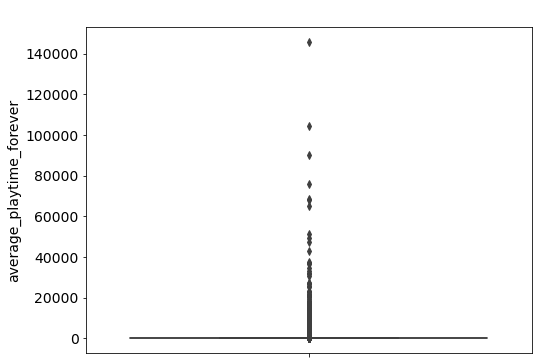

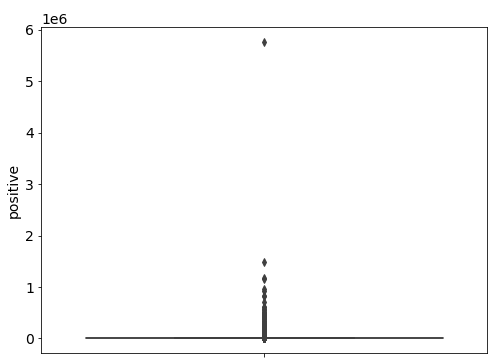

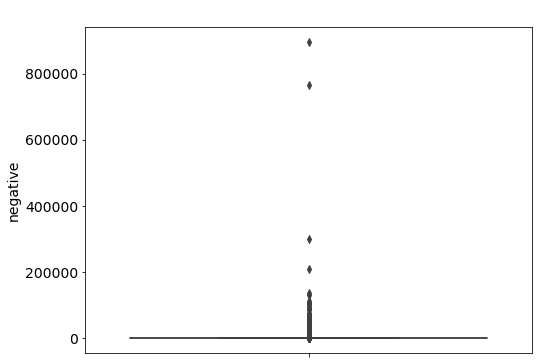

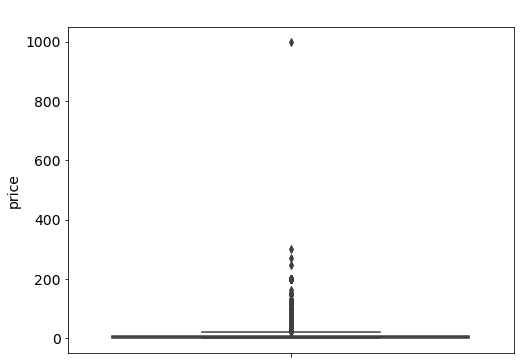

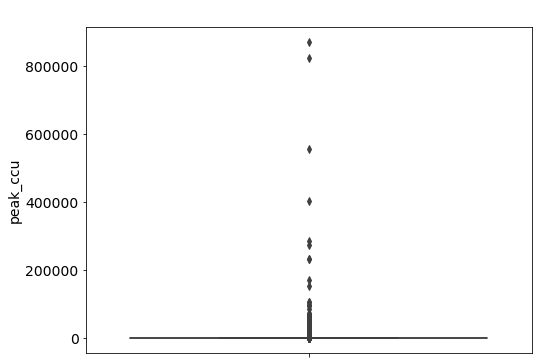

In [40]:
# Choose a list of numeric columns for visualization
numeric_columns = ['average_playtime_forever', 'positive', 'negative', 'price', 'peak_ccu']
#numeric_columns = ['average_playtime_forever']

# Create box plots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_small, y=column)
    plt.ylabel(column)
    plt.title(f'Box Plot of {column} with Outliers')
    plt.show()